# Data Cleaning 
### Partition data into separate stations
1. Set the starting date to the same non NAN value.
2. Check the date index in the new table is without interuption and continuous.
3. Evaluate one variable at a time and use the following option for filling
    1. plot the data and evaluate the plot
    2. fill the missing data using interpolation for short period (~week) of missing data
    3. For long records (> 1 week) of missing data:
        1. Sampling from a similar year. Similarity is measured based on Correlation coefficient.
        2. Sampling from the over all annual mean and std. 
        3. Regression
           1. based on another station the same variable
           2. predictor based regression. e.g. humidity based on Temperature.
   

In [55]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import copy
np.random.seed(50)
import pylab


In [56]:
# Load in the data table
table = pd.read_csv('siikaneva_hourly_data.csv', header=0)

table = table.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis=1);
dates = pd.date_range(start='1/1/2005 0:15', end='12/31/2015 23:45', freq='30min')
table['Datetime'] = dates
table = table.set_index(['Datetime'])

In [57]:
table.head()

,T_air,Rh,R_net,T_-5cm,T_-10cm,T_-20cm,T_-35cm,T_-50cm,WT,P,methane_flux,U,WD,Ustar,NEE,NEE_gapfilled
Datetime,,,,,,,,,,,,,,,,
2005-01-01 00:15:00,-1.6,86.9,-1.5,-0.1,-0.4,-0.2,0.5,1.3,9.3,0.0,NaN,NaN,NaN,NaN,NaN,0.2044
2005-01-01 00:45:00,-1.5,86.4,-1.3,0.0,-0.4,-0.2,0.5,1.3,9.3,0.0,NaN,NaN,NaN,NaN,NaN,0.2044
2005-01-01 01:15:00,-1.4,85.6,-1.2,0.0,-0.4,-0.2,0.5,1.3,9.3,0.0,NaN,NaN,NaN,NaN,NaN,0.2044
2005-01-01 01:45:00,-1.2,84.6,-1.1,0.0,-0.4,-0.2,0.5,1.3,9.3,0.0,NaN,NaN,NaN,NaN,NaN,0.2044
2005-01-01 02:15:00,-0.9,81.2,-0.8,-0.1,-0.4,-0.2,0.5,1.3,9.3,0.0,NaN,NaN,NaN,NaN,NaN,0.2044


# Generate time series plots

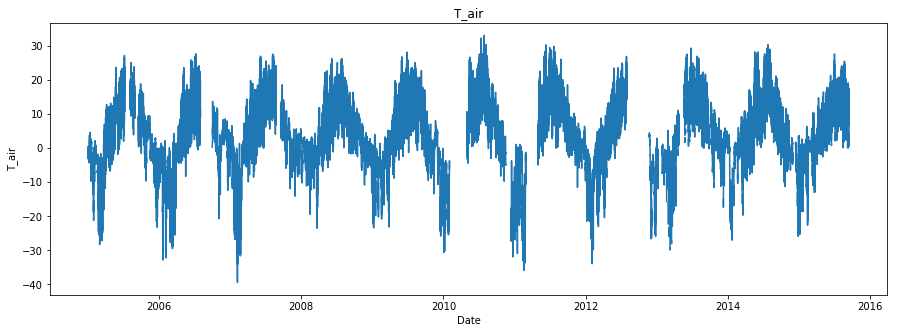

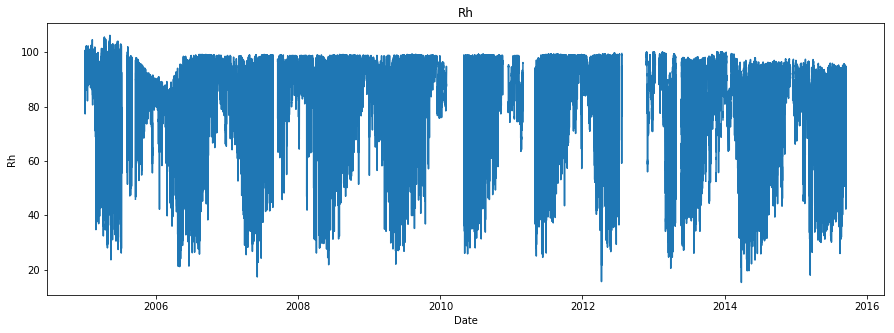

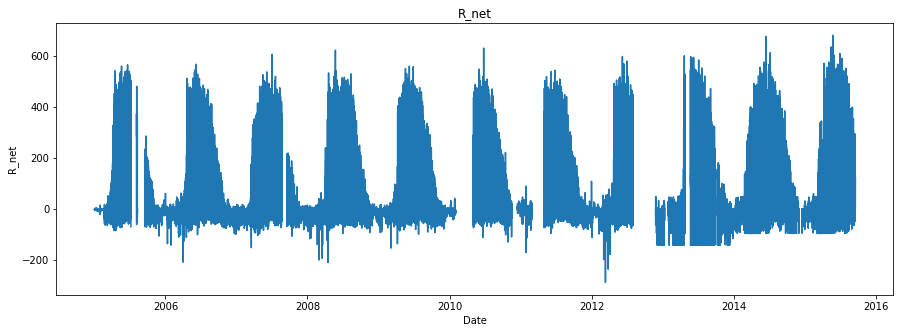

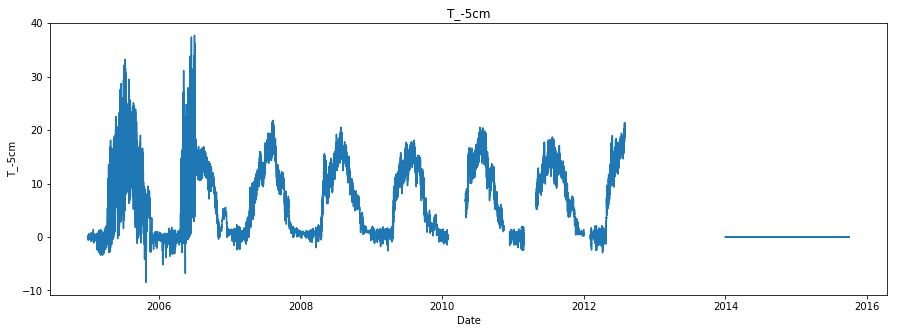

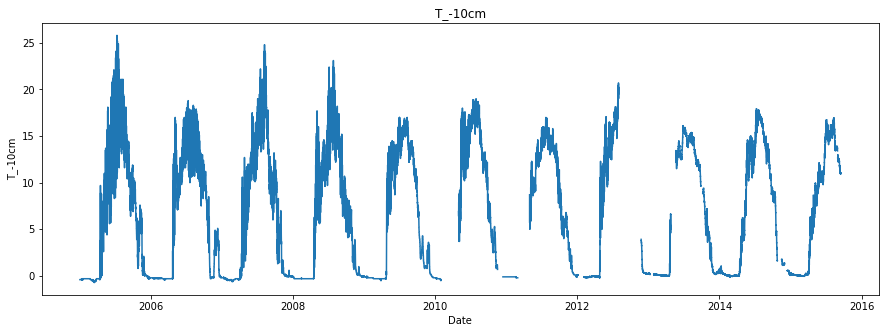

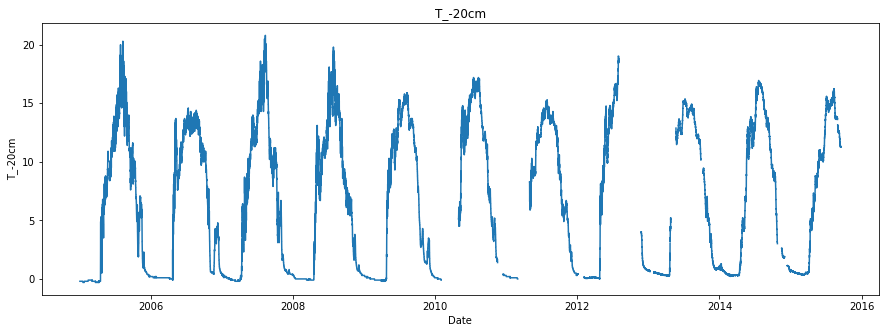

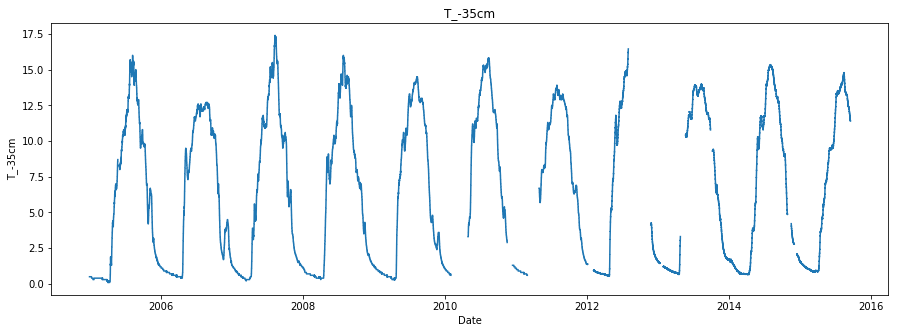

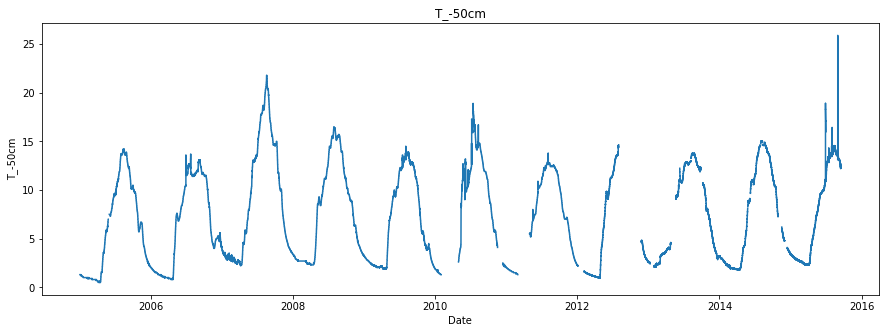

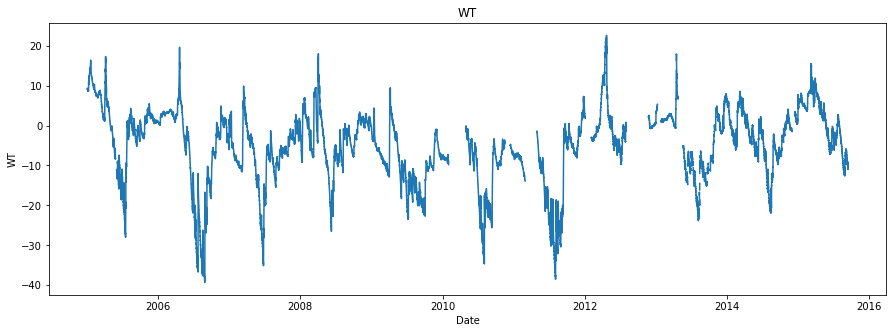

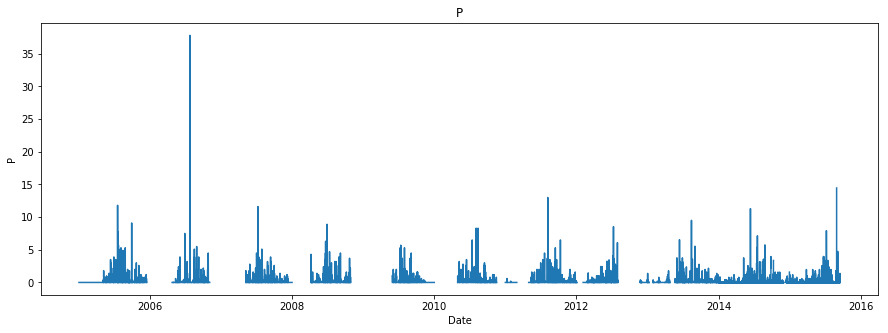

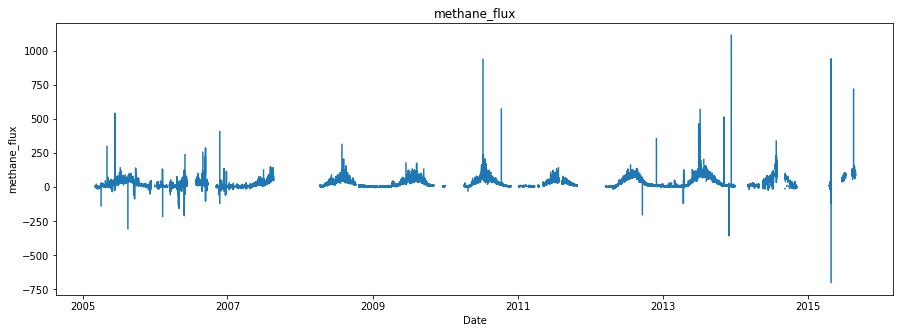

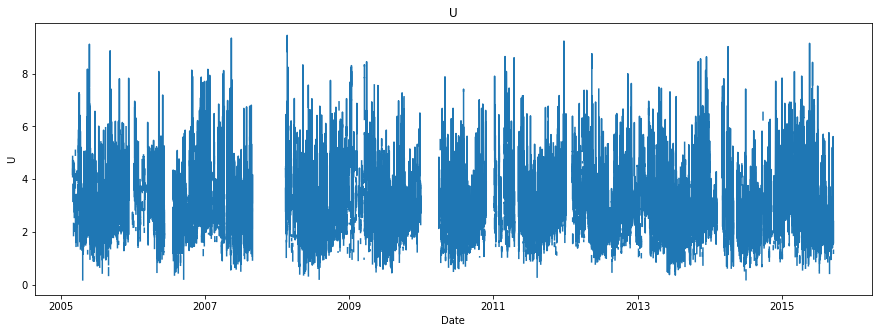

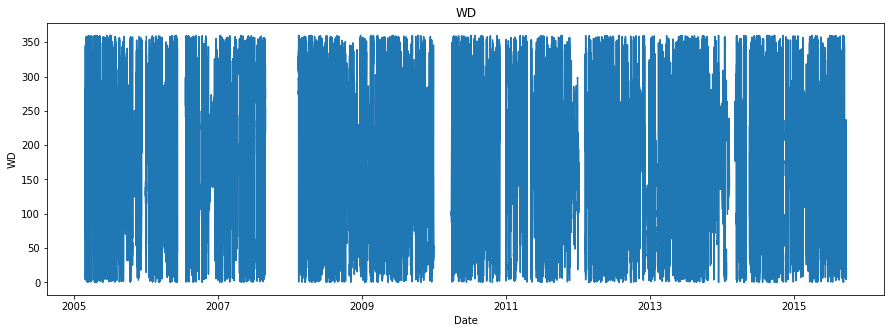

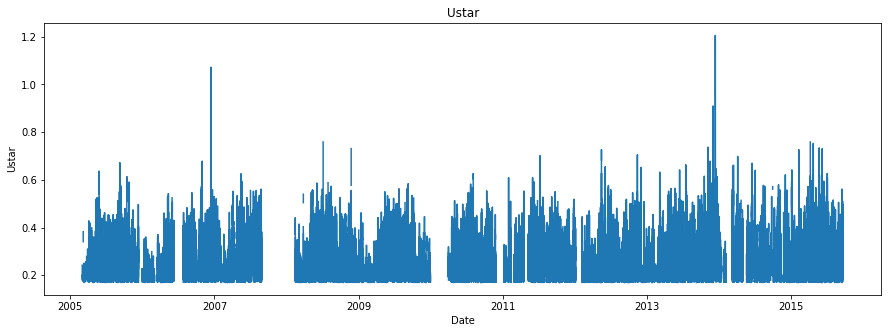

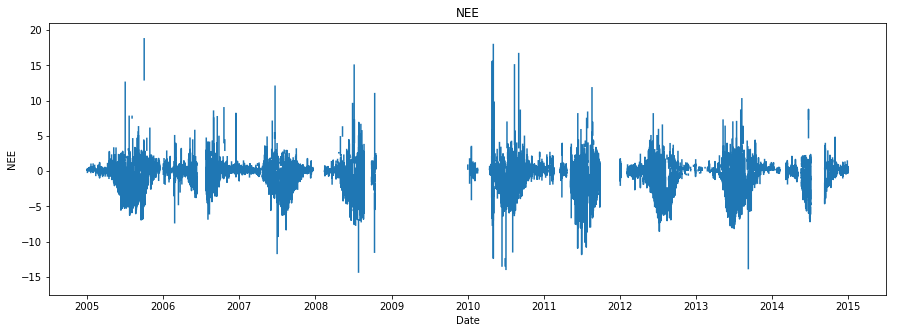

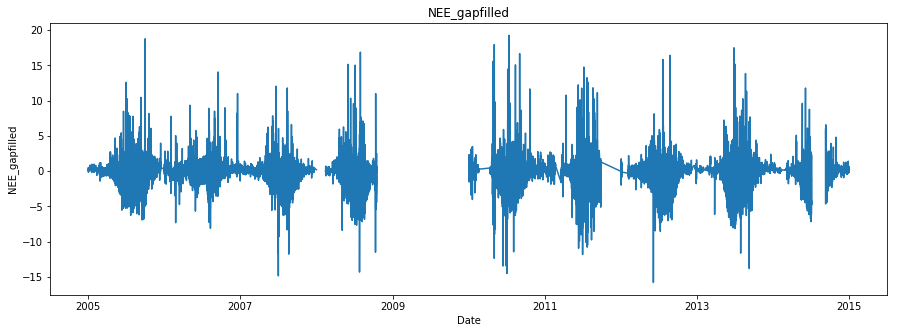

In [58]:
count = 0
for column in table:
    plt.figure(figsize=[15,5])
    plt.plot(table[column])
    plt.title(table.columns[count])
    plt.xlabel('Date')
    plt.ylabel(table.columns[count])
    count = count + 1

## Observations
 - Rh has a few values > 100
 - Looks like there was an early problem with surficial soil temperature sensors (effects visible down to 20 cm)--variability is much higher than in later years. Exclude these data. 
 - In later years, net radiation appears to bottom out at a hard value. Exclude these datapoints.
 - T at -5 cm has some erroneous zeros that need to be excluded.
 - Is 35+ cm P spike in late 2006 real? 
 - Exclude zeros at beginning of P record
 - Remove negative values of methane flux and spikes over 250

## Now address these problems:
### Relative humidity > 100

Text(0,0.5,'Rh')

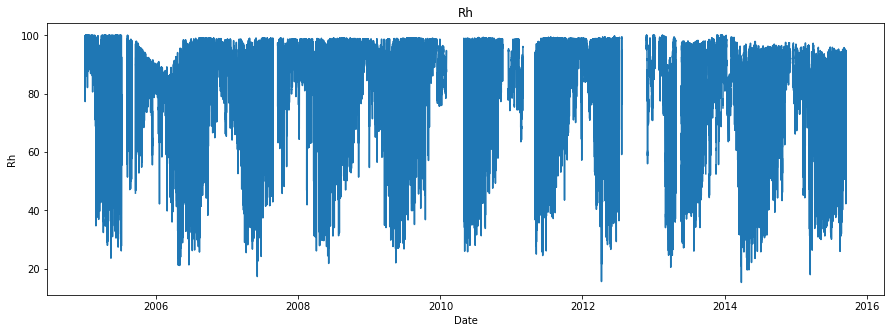

In [59]:
table.loc[table['Rh'] > 100, 'Rh'] = 100
plt.figure(figsize=[15,5])
plt.plot(table['Rh'])
plt.title('Rh')
plt.xlabel('Date')
plt.ylabel('Rh')

## Zeros and spike in P

<IPython.core.display.Javascript object>


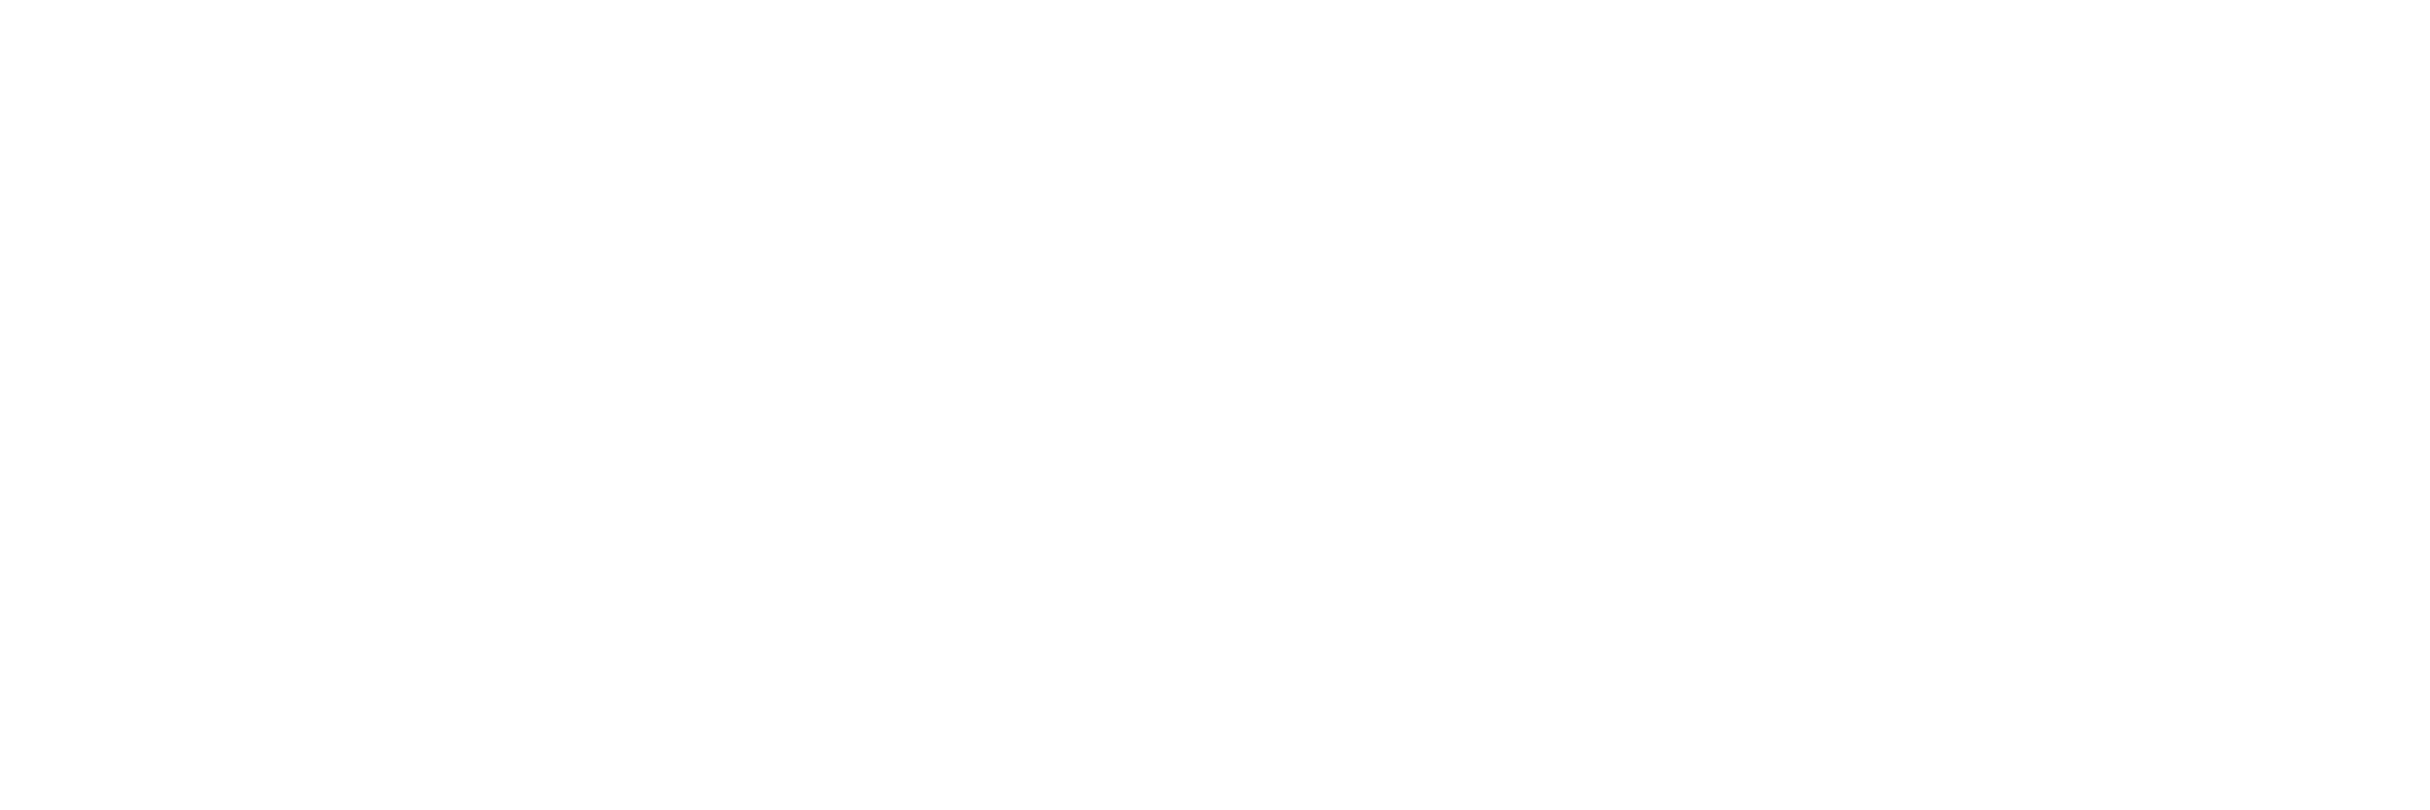

Text(0,0.5,'P')

<IPython.core.display.Javascript object>


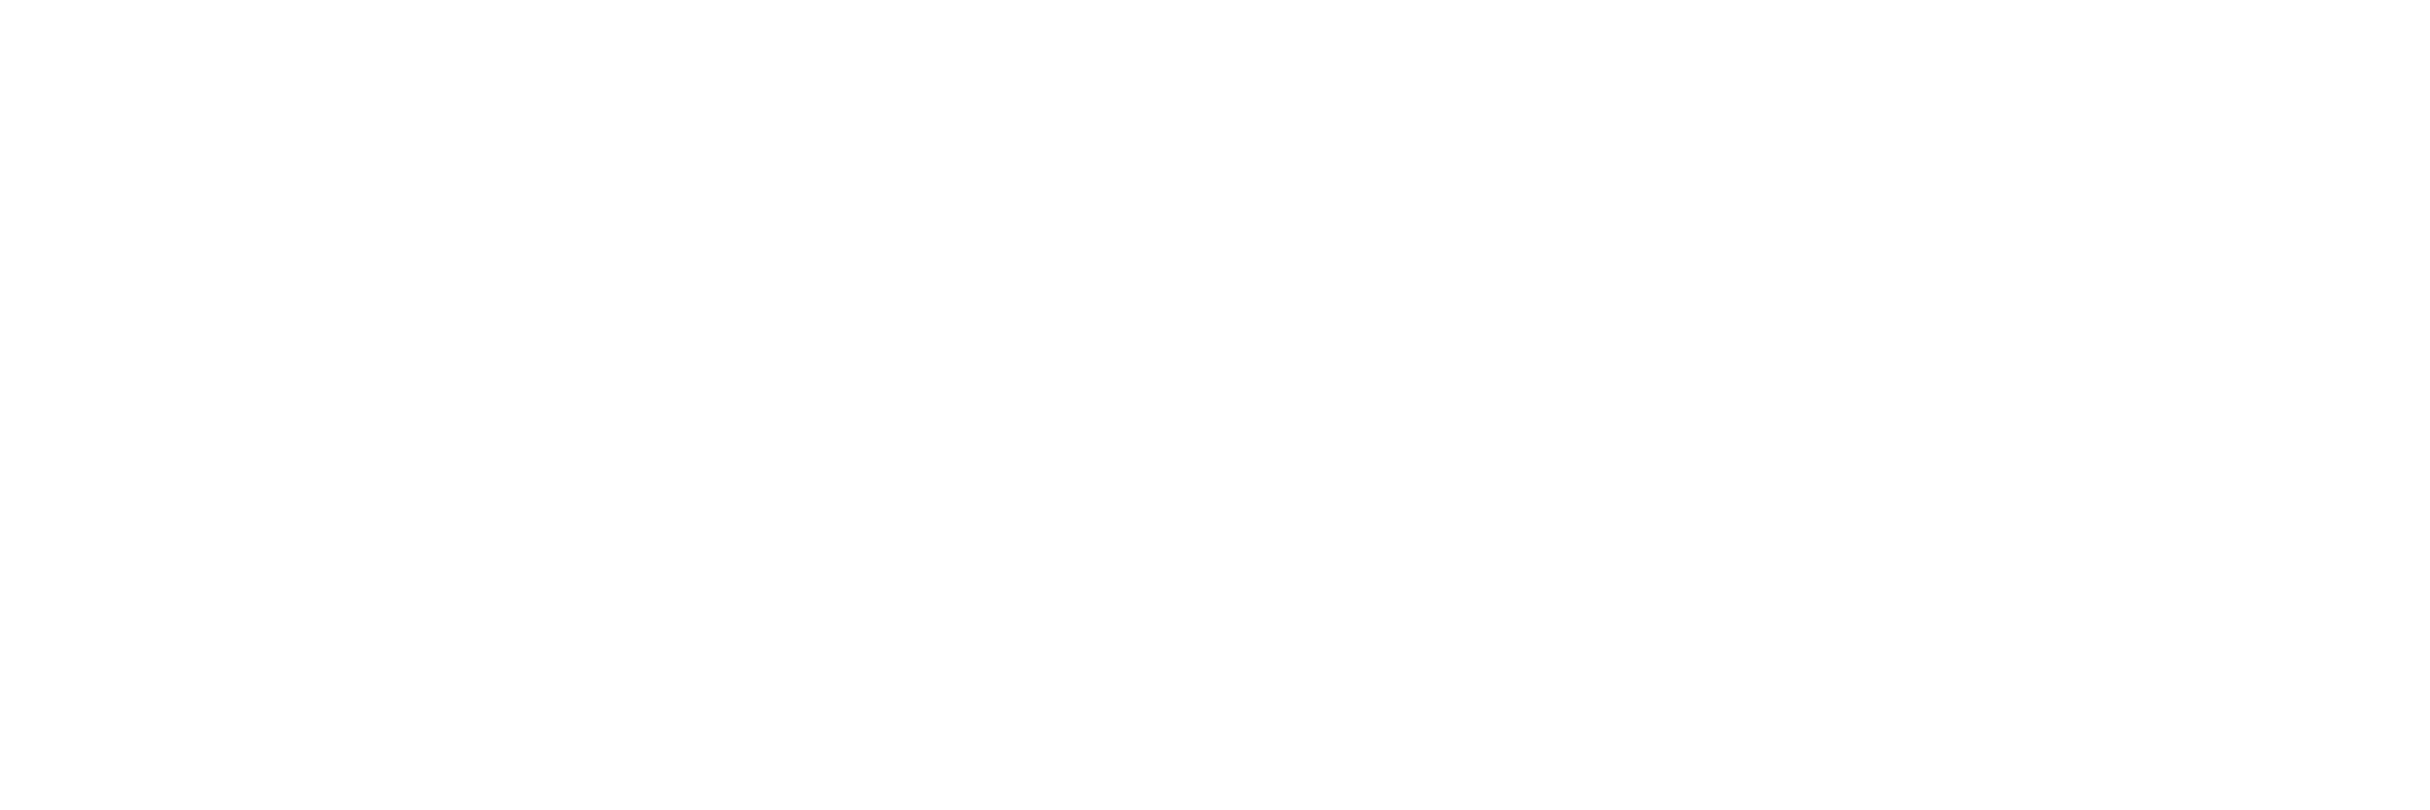

In [60]:
%matplotlib notebook
%matplotlib notebook 
# Repeating this is a hack to avoid restarting the kernel (since matplotlib inline has already been called)


#table.loc[table['R'] > 1000, 'R'] = np.nan
plt.figure(figsize=[15,5])
plt.plot(table['P'])
plt.title('P')
plt.xlabel('Date')
plt.ylabel('P')

#### Observations
Zeros go to 2005-05-05. Highly unlikely that there was no precipitation for months, so convert these to Nans. Likewise, suspiciously many zeros from 11/16/2009-01/01/2010. The spike is on 7/24/2006. If precipitation is in mm, this could be reasonable for a large storm. Water table does go up a lot at that time. However, this one very high spike could be a problem for binning, so go ahead and remove it.

Fix the problems:

Text(0,0.5,'P')

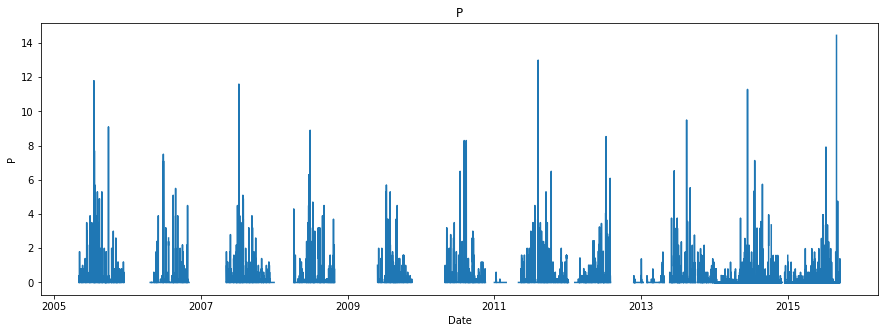

In [68]:
table.loc['2005-01-01 00:15:00':'2005-05-05 00:15:00', ['P']] = np.nan
table.loc['2009-11-16 00:15:00':'2010-01-01 00:15:00', ['P']] = np.nan
table.loc[(table.P>30), ['P']] = np.nan

plt.figure(figsize=[15,5])
plt.plot(table['P'])
plt.title('P')
plt.xlabel('Date')
plt.ylabel('P')

## Soil temperature
First, produce an interactive plot to determine date ranges of problem areas.

<IPython.core.display.Javascript object>


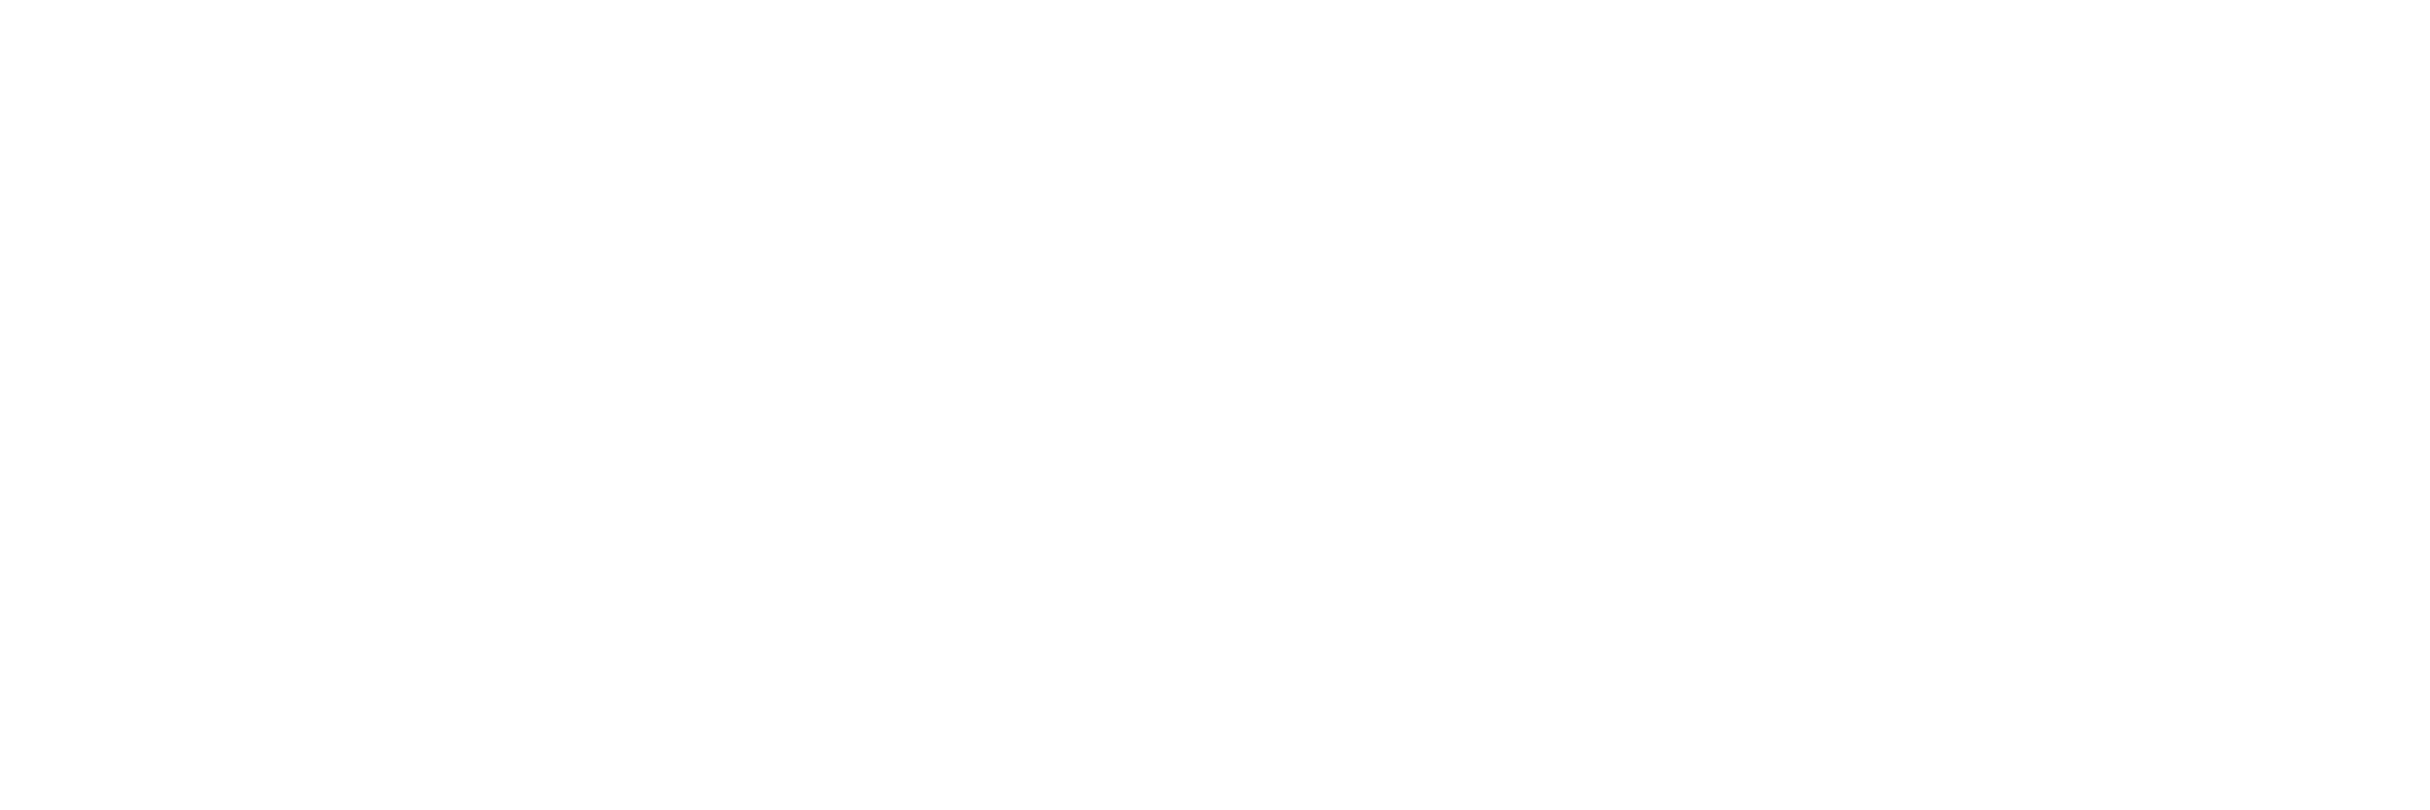

Text(0,0.5,'T_-5cm')

<IPython.core.display.Javascript object>


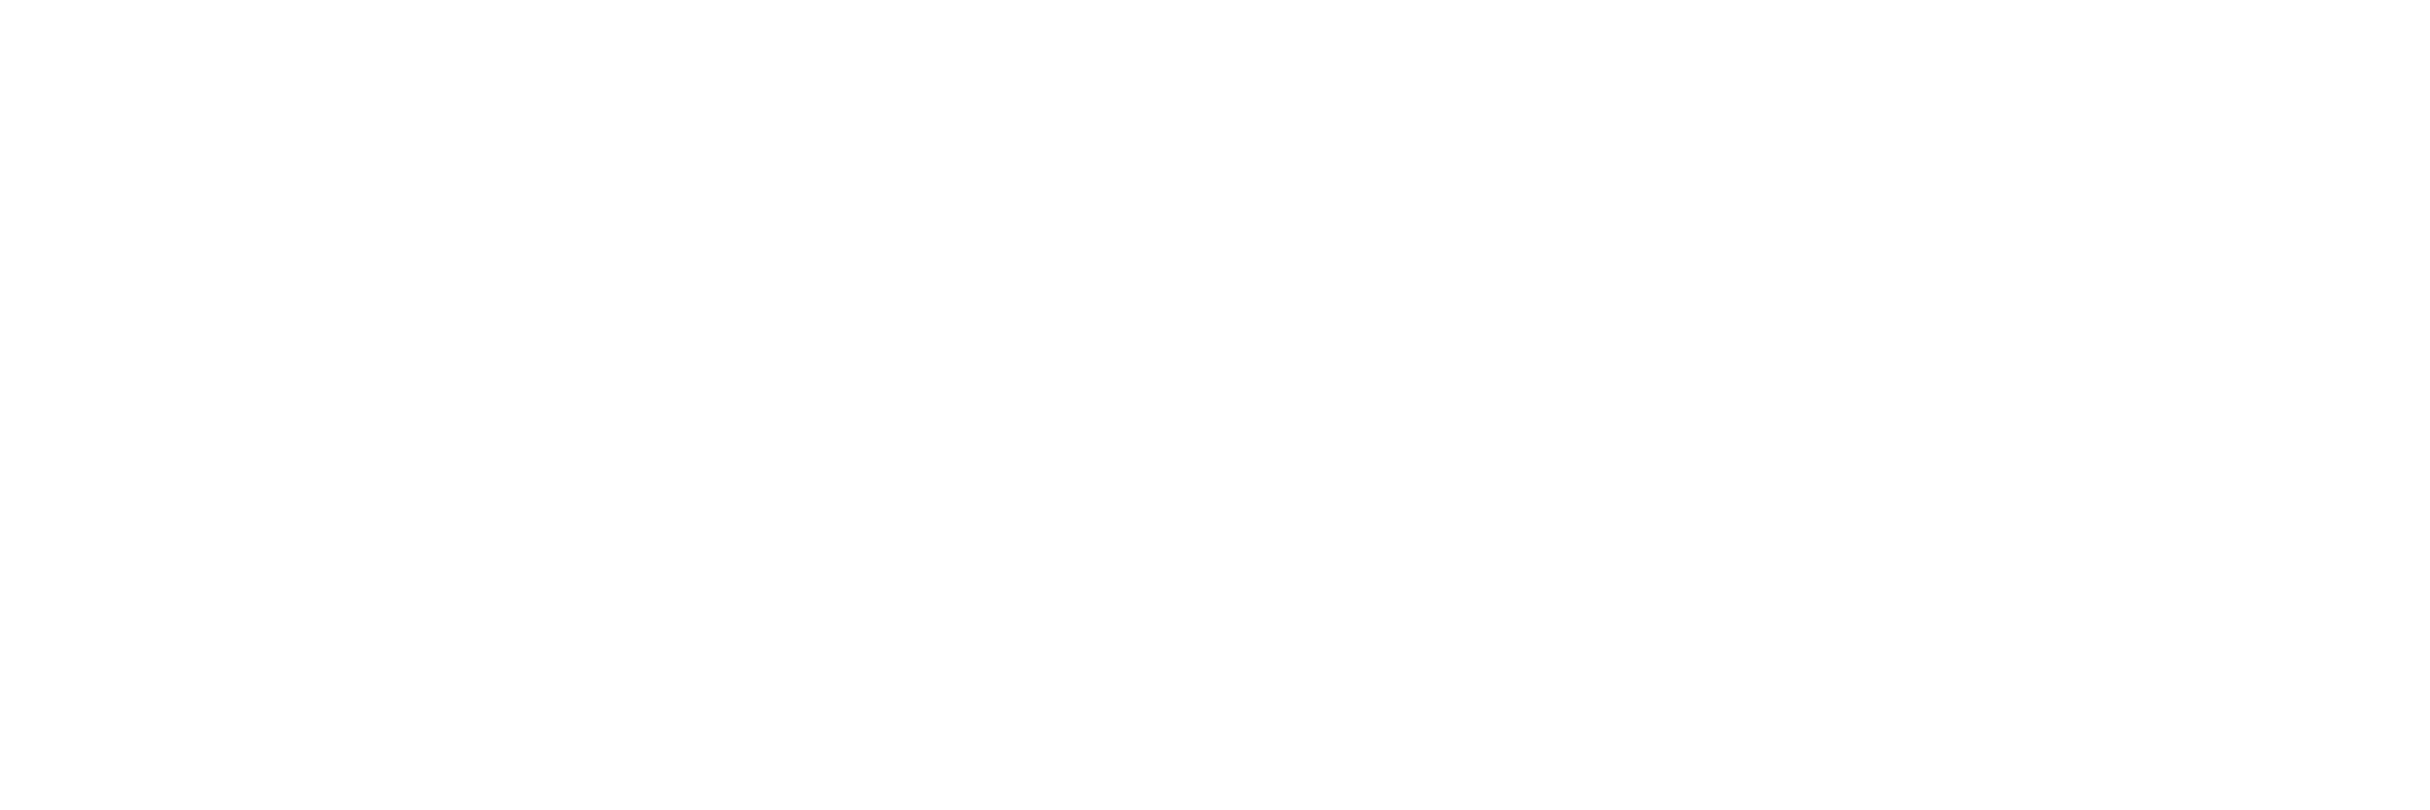

In [62]:
#%matplotlib notebook
#%matplotlib notebook # Repeating this is a hack to avoid restarting the kernel (since matplotlib inline has already been called)
plt.figure(figsize=[15,5])
plt.plot(table['T_-5cm'])
plt.title('T_-5cm')
plt.xlabel('Date')
plt.ylabel('T_-5cm')

#### Observations
 - Good data start at 2006/07/07 10:45
 - Erroneous zeros start at 2014/01/01.
 
Fix these:

<IPython.core.display.Javascript object>


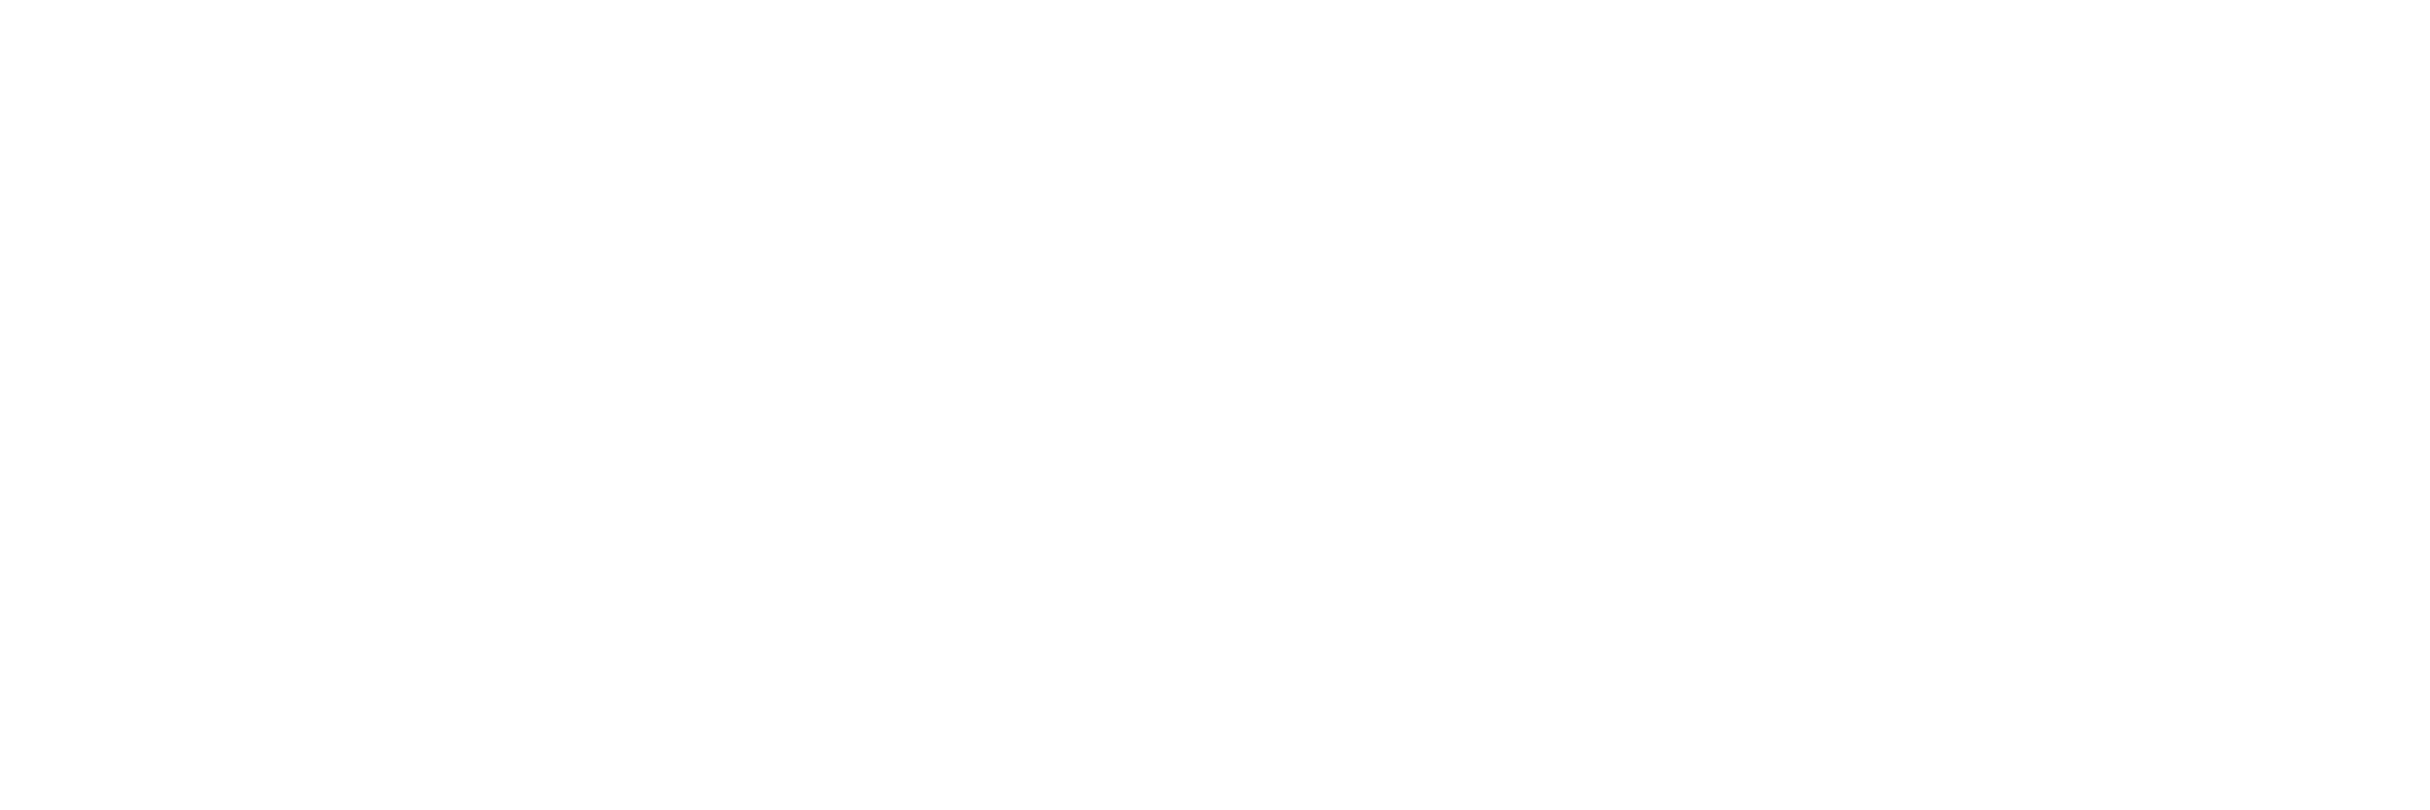

<IPython.core.display.Javascript object>


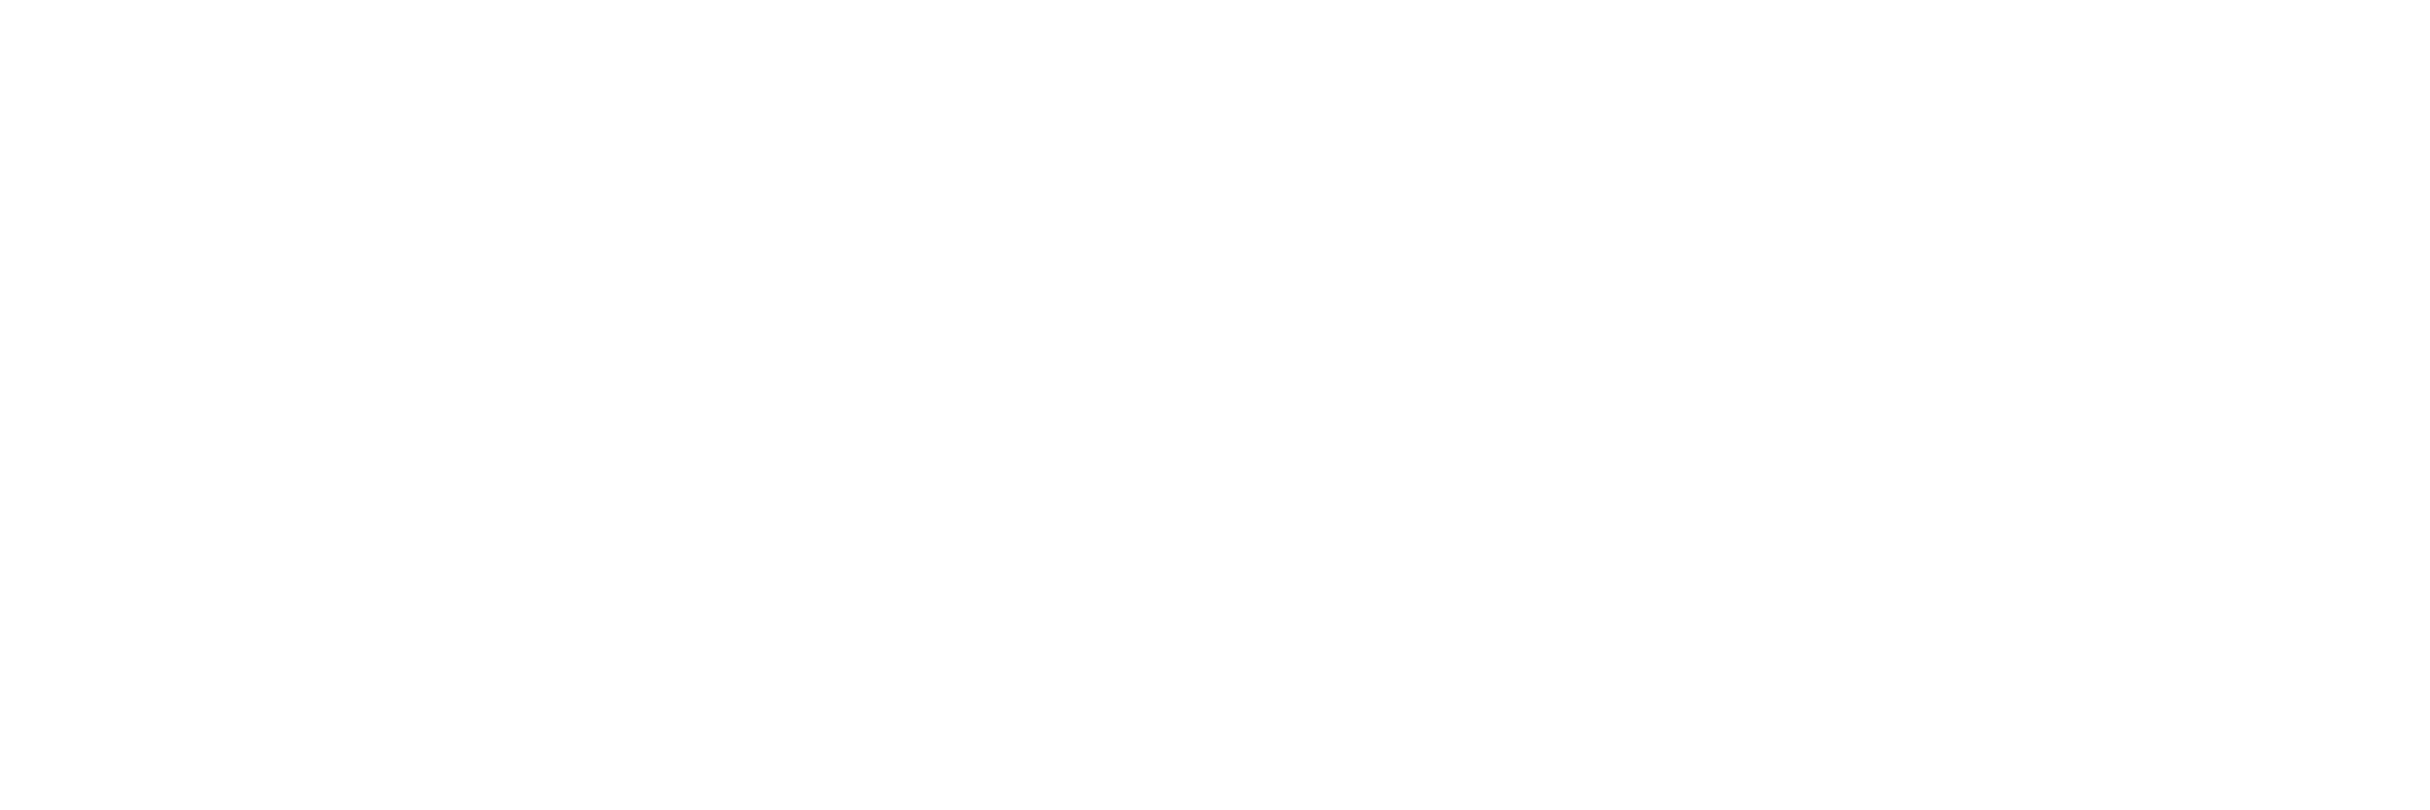

<IPython.core.display.Javascript object>


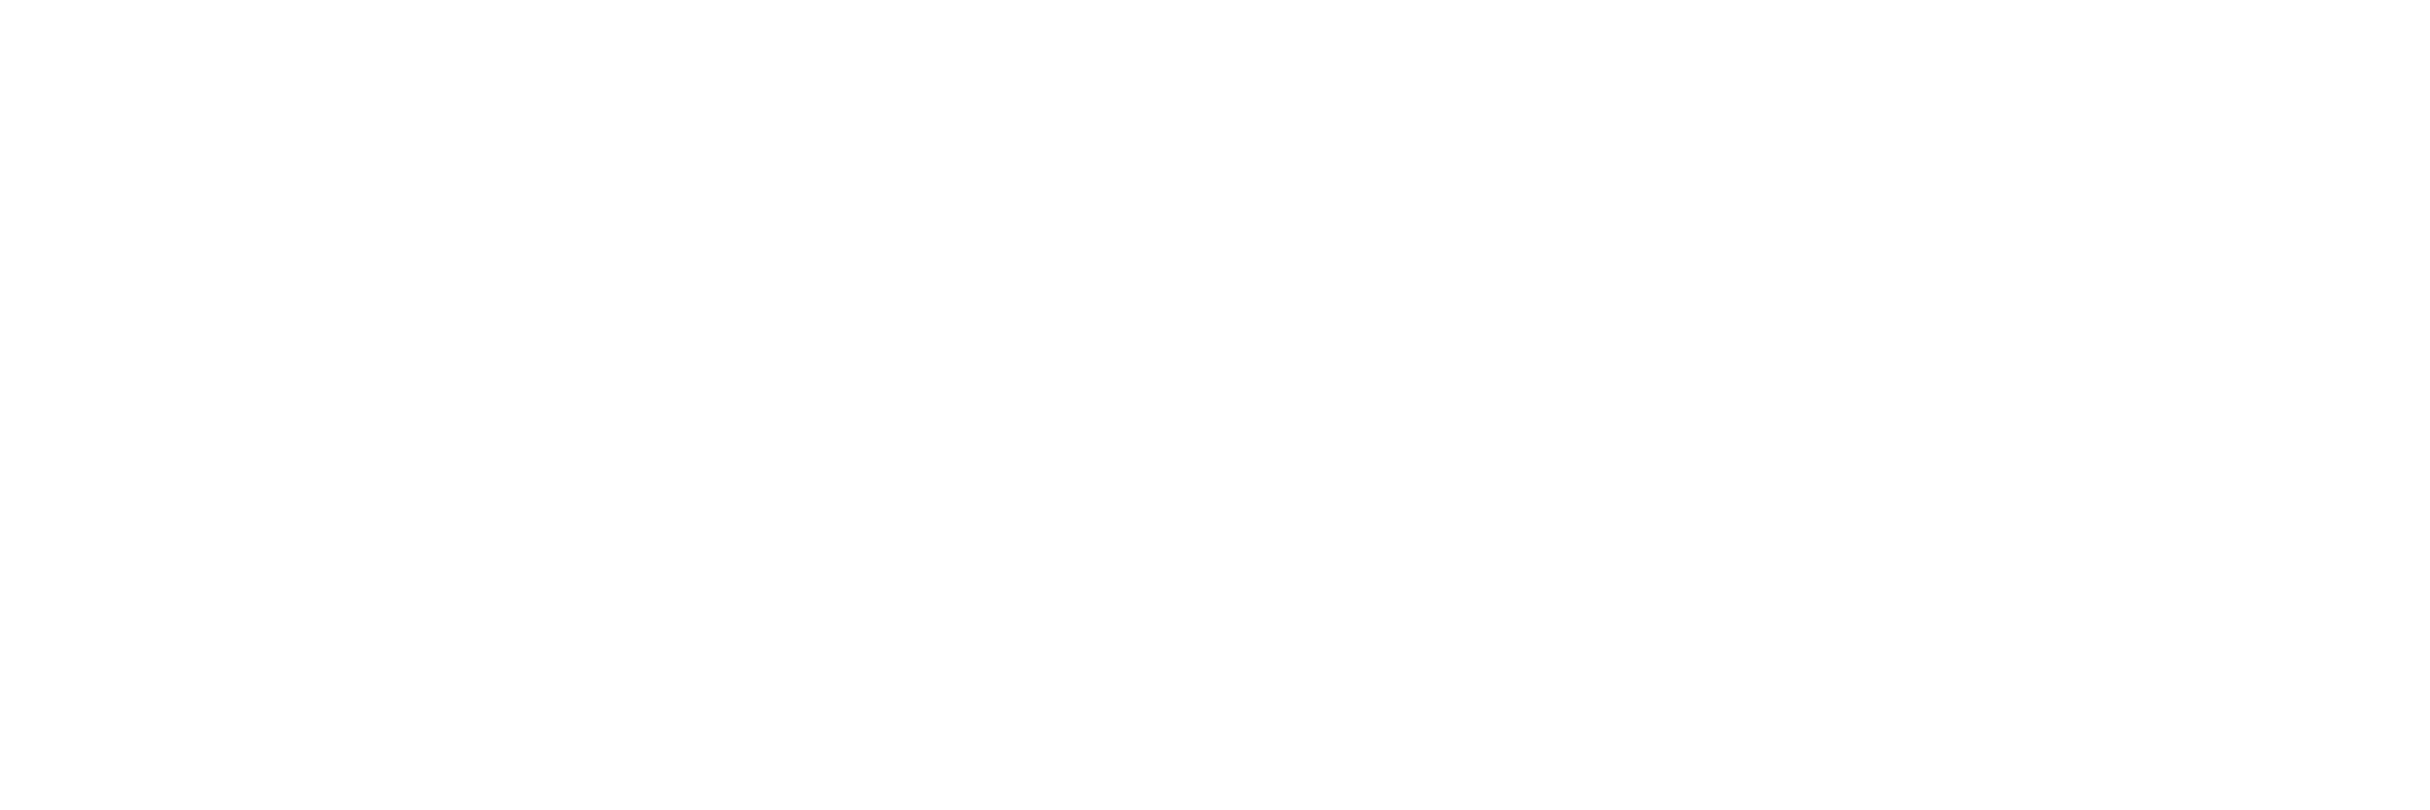

Text(0,0.5,'T_-20cm')

<IPython.core.display.Javascript object>


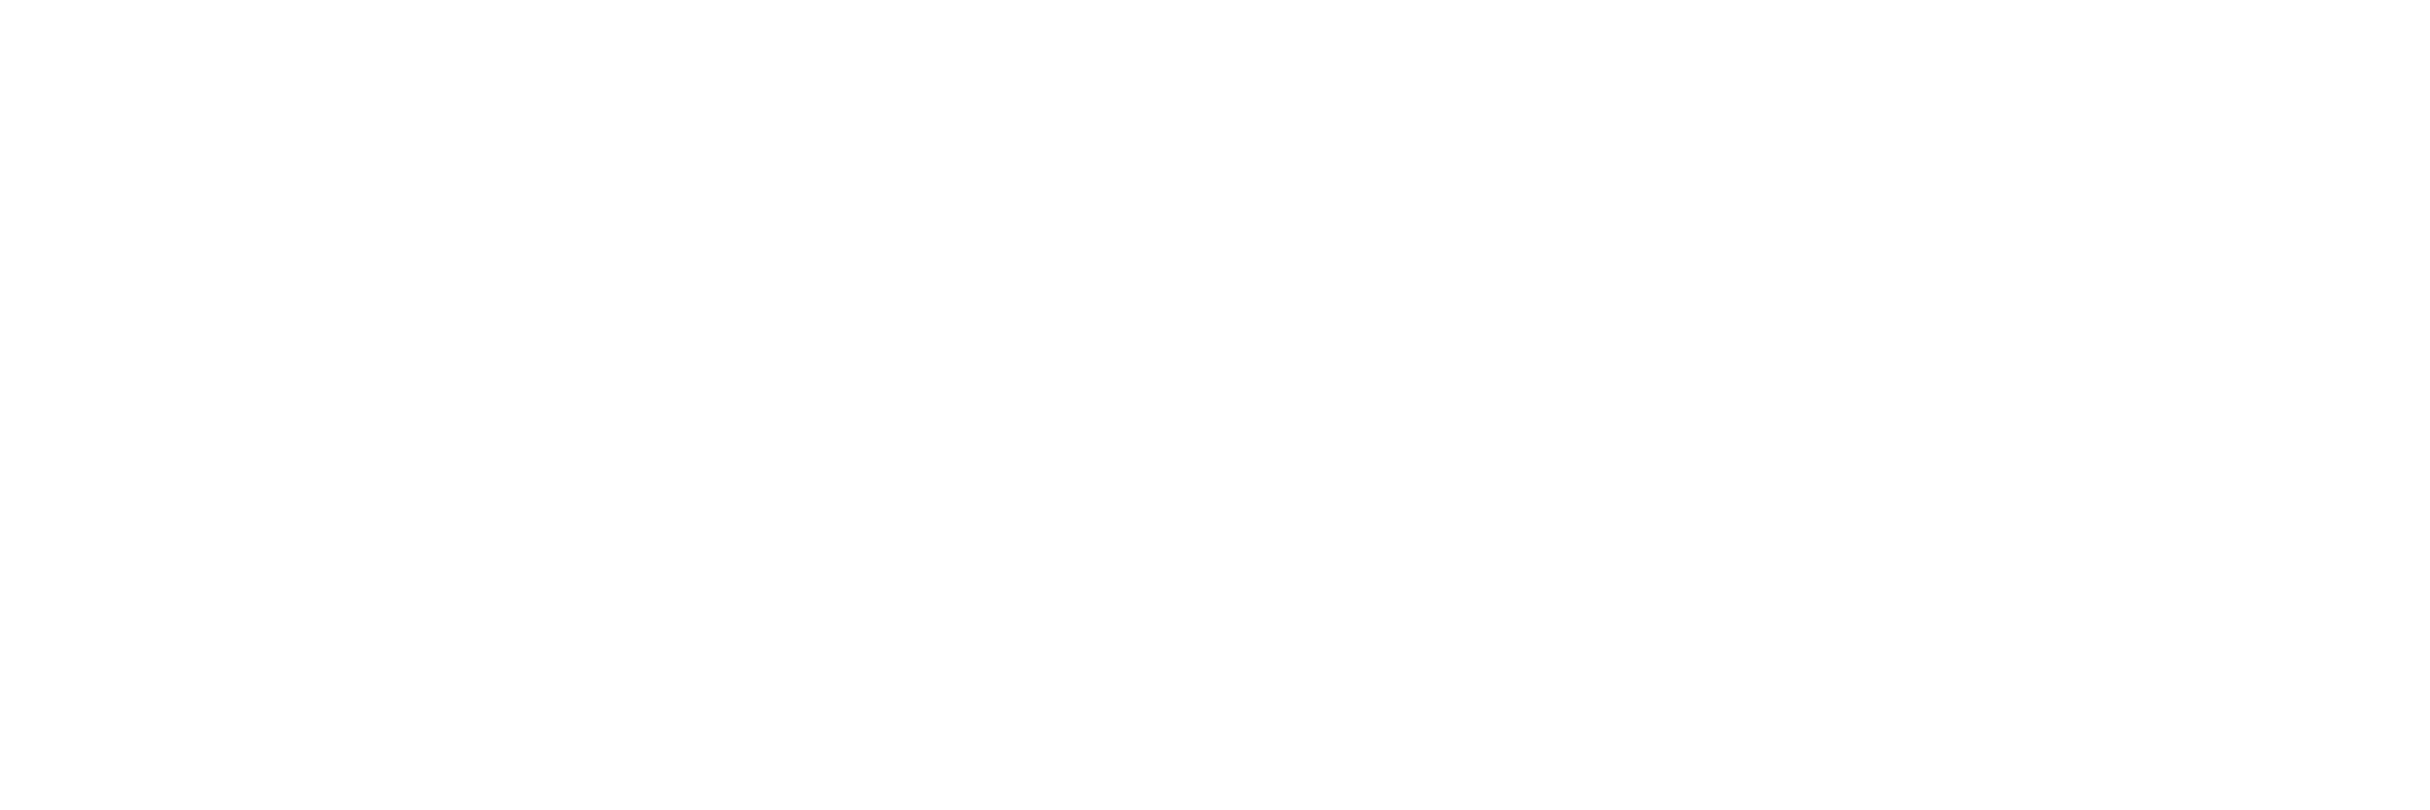

<IPython.core.display.Javascript object>


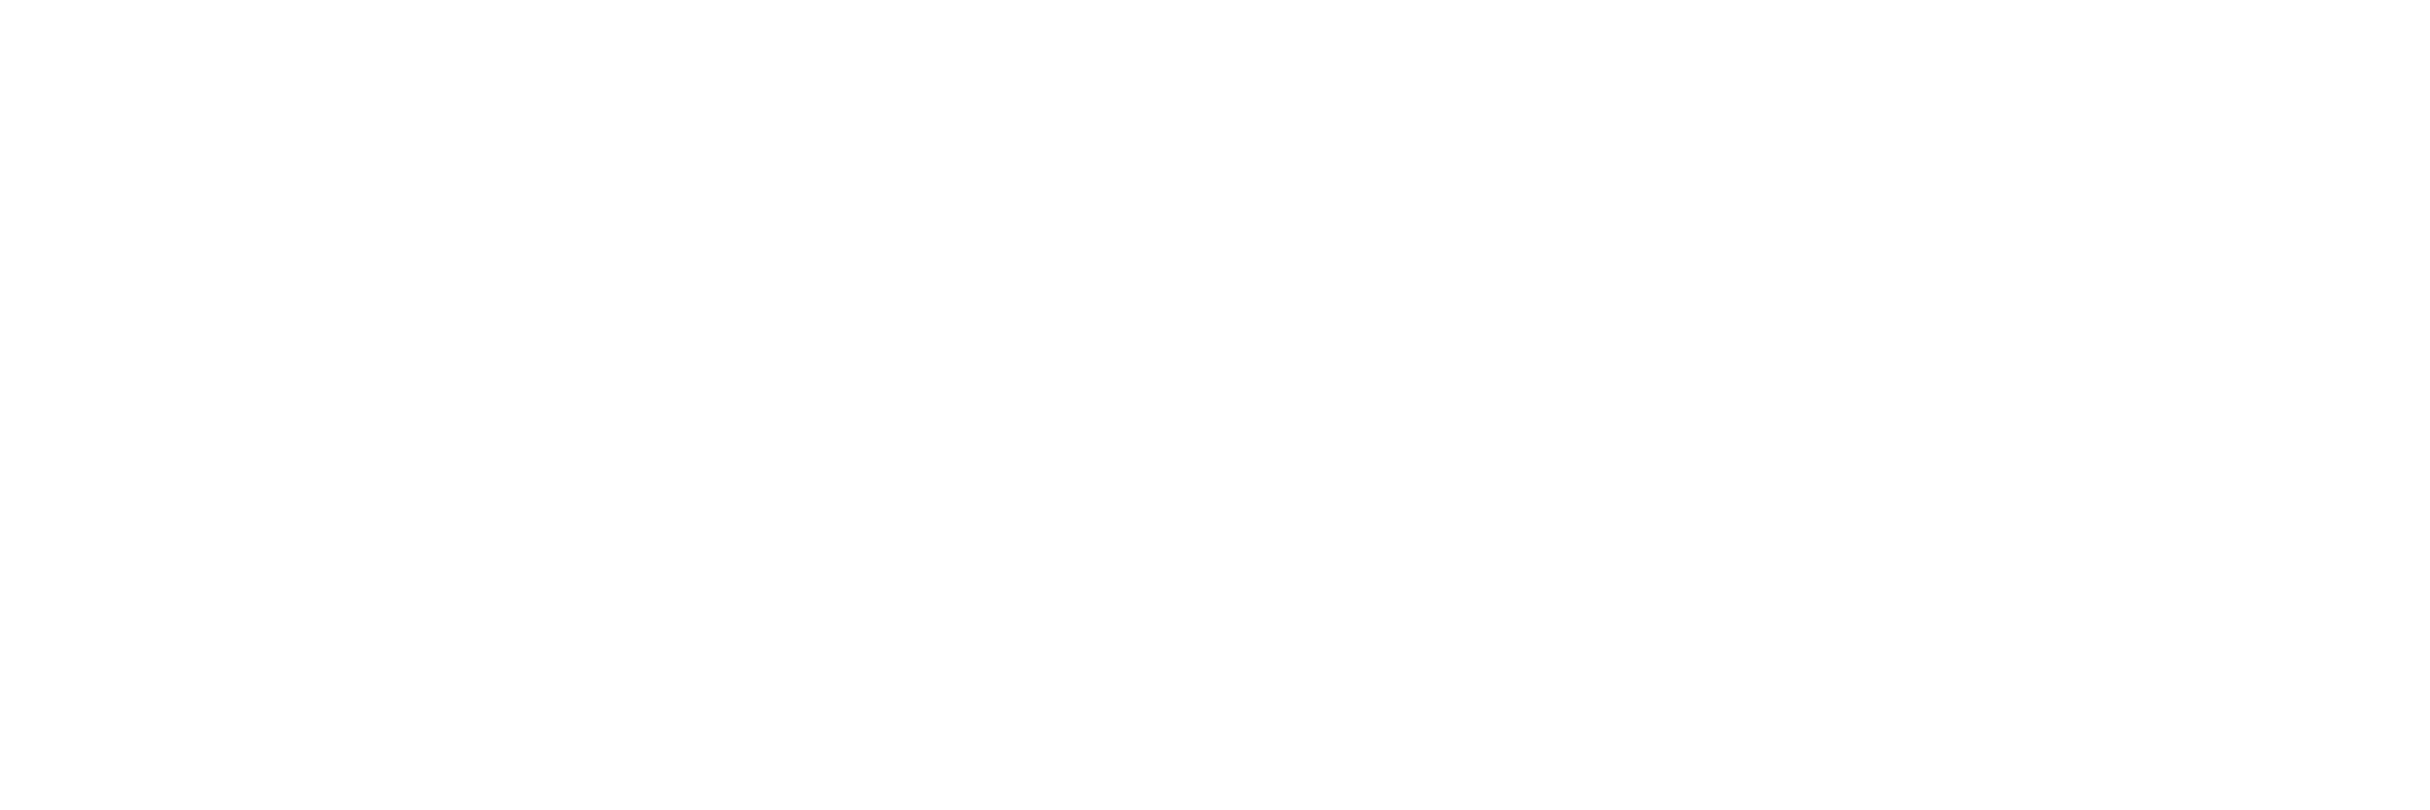

<IPython.core.display.Javascript object>


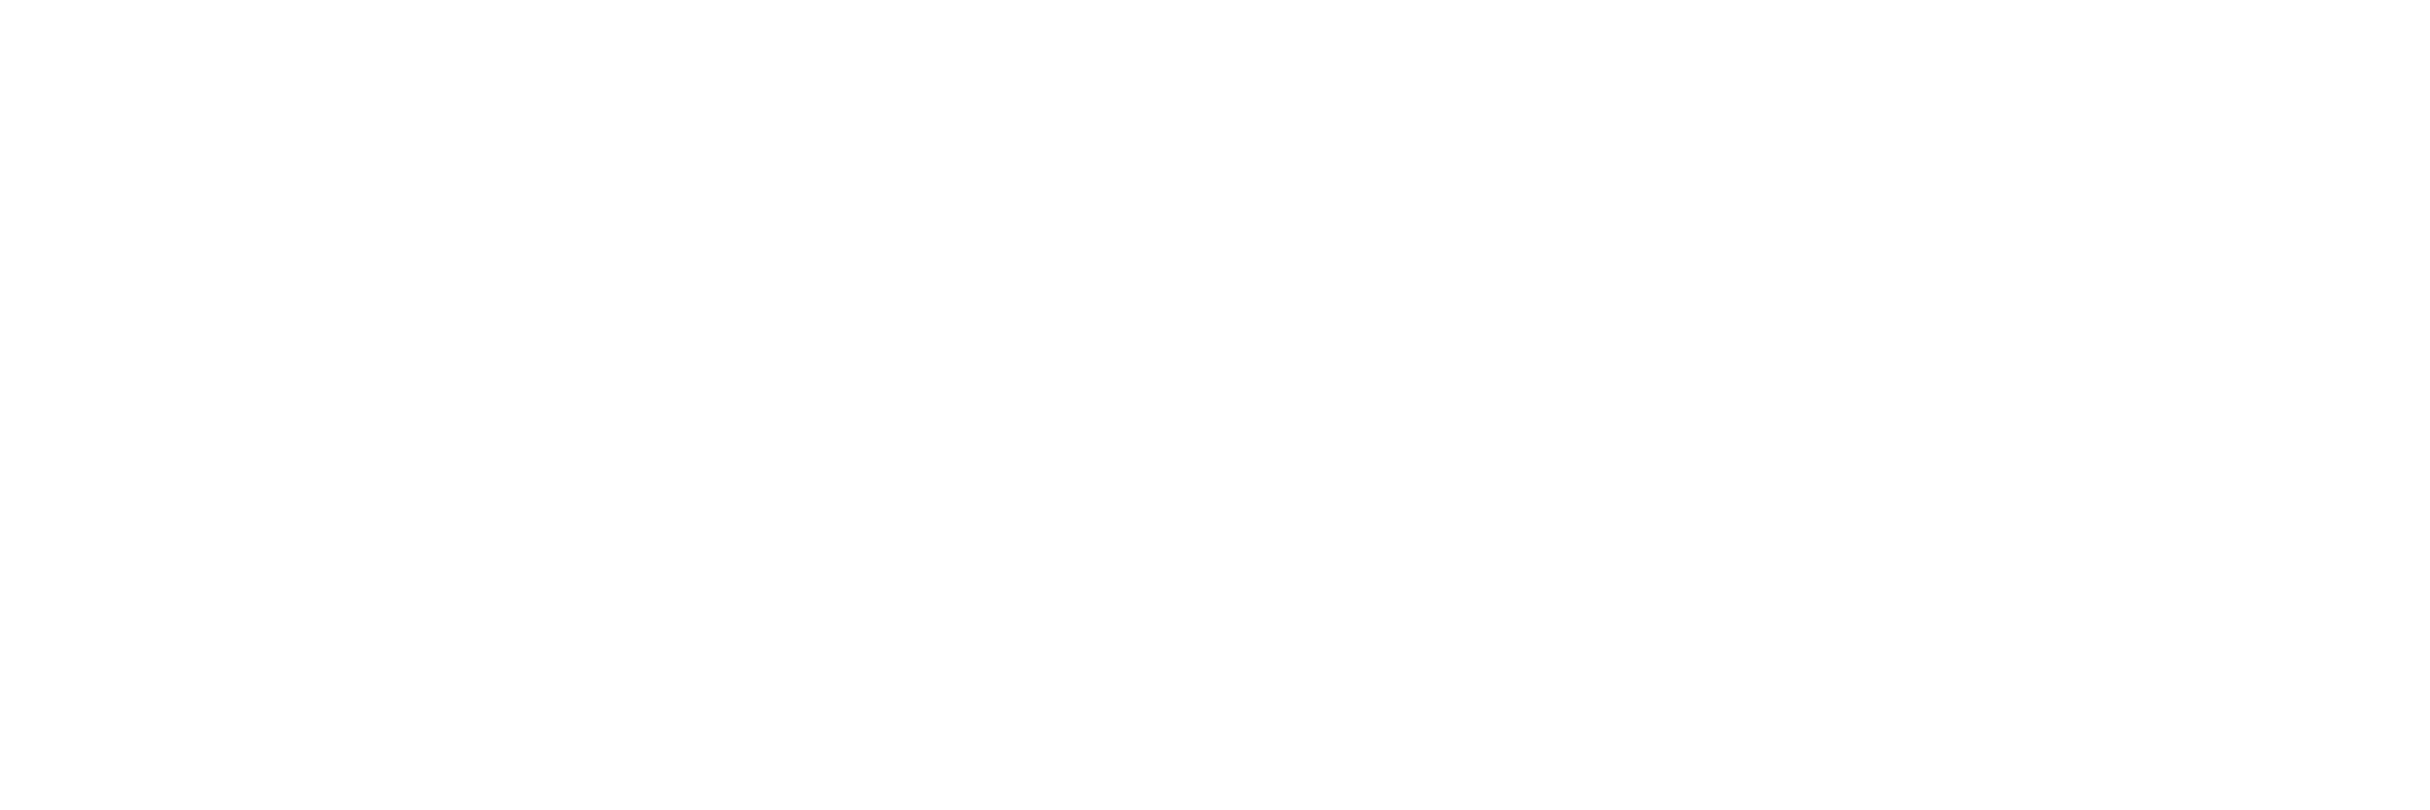

In [63]:
table.loc['2005-01-01 00:15:00':'2006-07-07 10:45:00', ['T_-5cm', 'T_-10cm', 'T_-20cm']] = np.nan
table.loc['2014-01-01 00:15:00':'2015-12-31 23:45:00', ['T_-5cm']] = np.nan

plt.figure(figsize=[15,5])
plt.plot(table['T_-5cm'])
plt.title('T_-5cm')
plt.xlabel('Date')
plt.ylabel('T_-5cm')

plt.figure(figsize=[15,5])
plt.plot(table['T_-10cm'])
plt.title('T_-10cm')
plt.xlabel('Date')
plt.ylabel('T_-10cm')

plt.figure(figsize=[15,5])
plt.plot(table['T_-20cm'])
plt.title('T_-20cm')
plt.xlabel('Date')
plt.ylabel('T_-20cm')

Variance at 10 cm depth still seems problematic (heteroskedastic); just keep this in mind in the interpretation.

### Net radiation hard floor


<IPython.core.display.Javascript object>


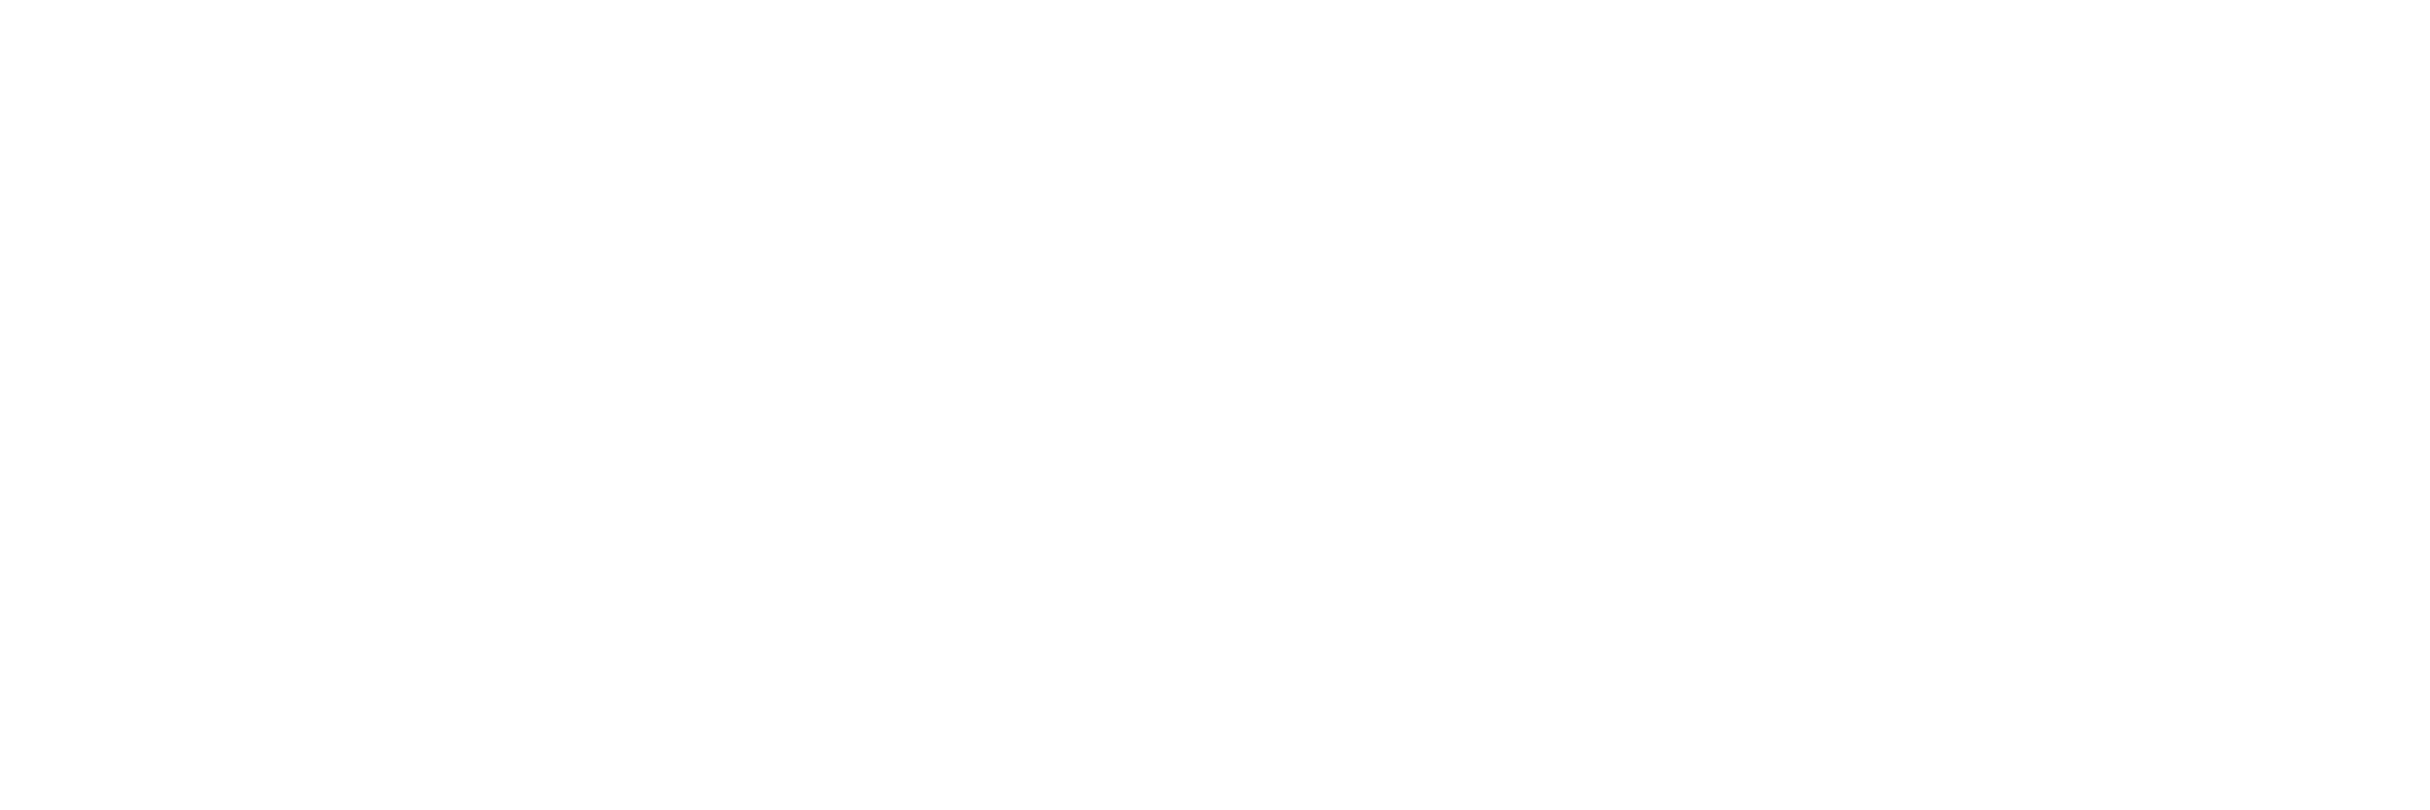

Text(0,0.5,'R_net')

<IPython.core.display.Javascript object>


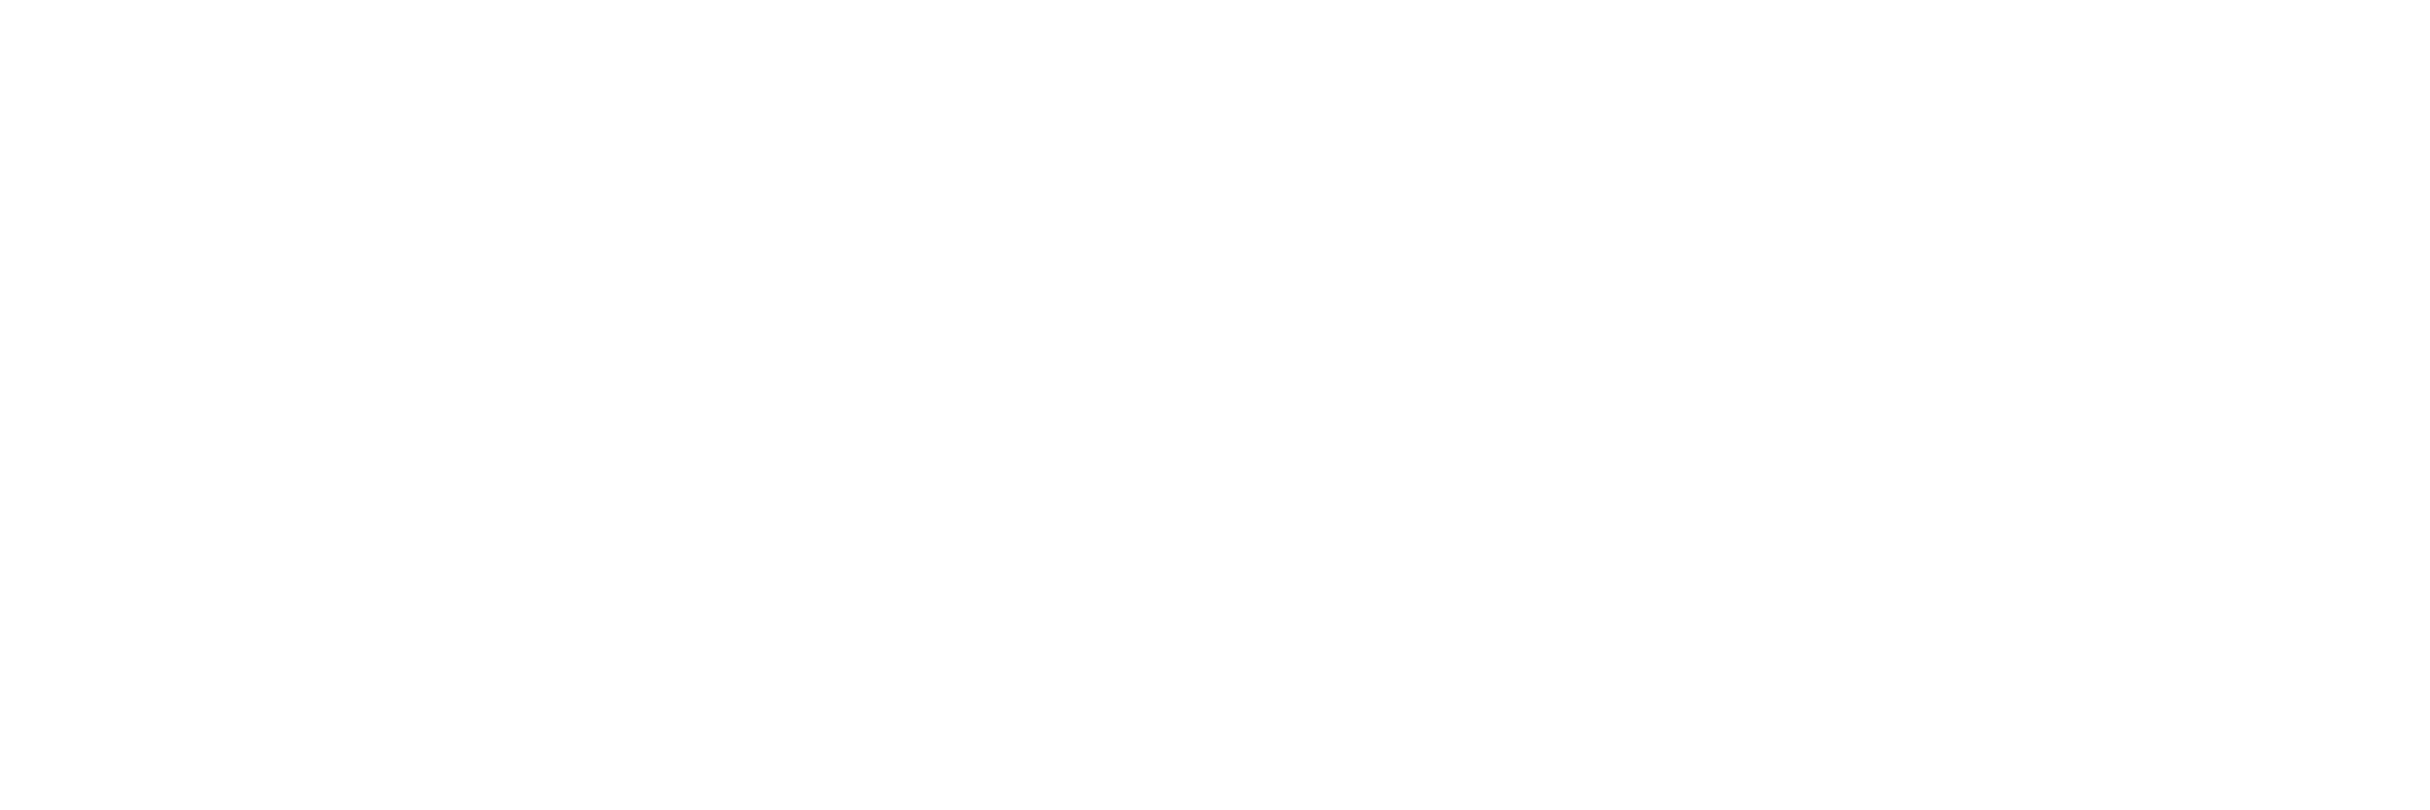

In [64]:
plt.figure(figsize=[15,5])
plt.plot(table['R_net'])
plt.title('R_net')
plt.xlabel('Date')
plt.ylabel('R_net')

After 2012-12-01, exclude values < -60:

<IPython.core.display.Javascript object>


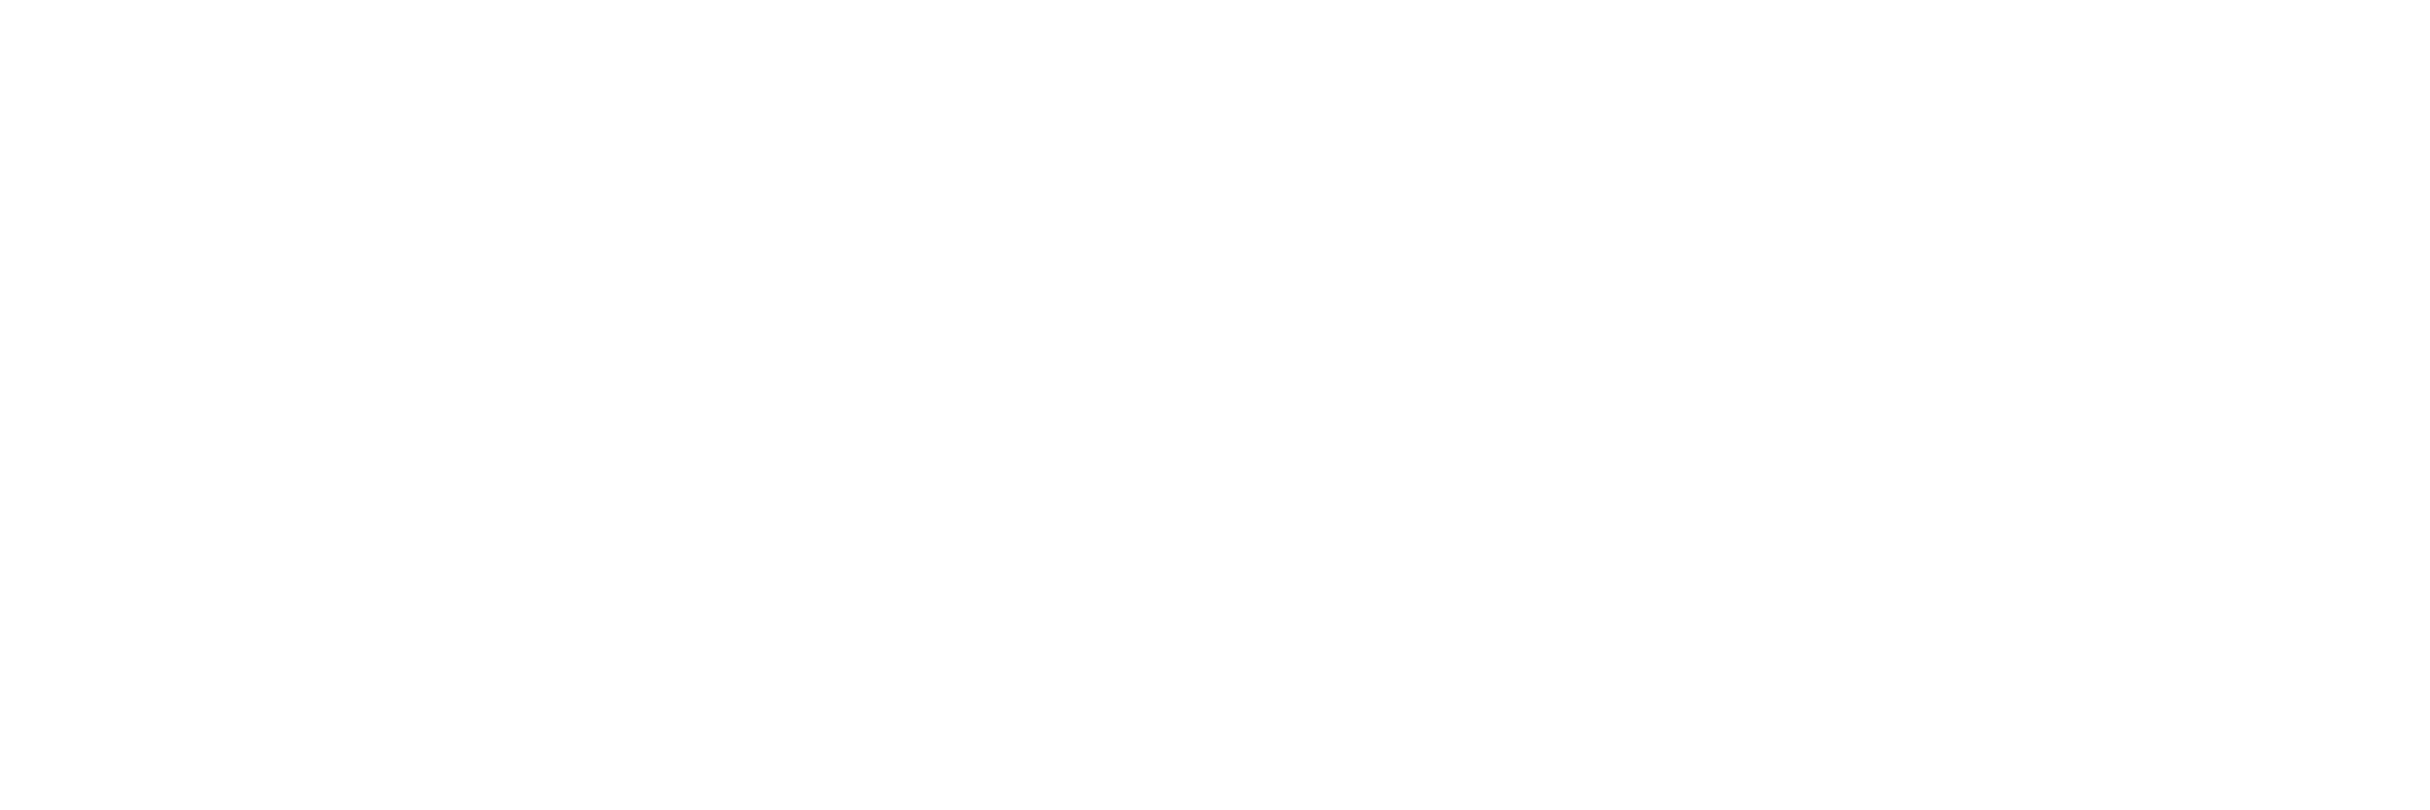

Text(0,0.5,'R_net')

<IPython.core.display.Javascript object>


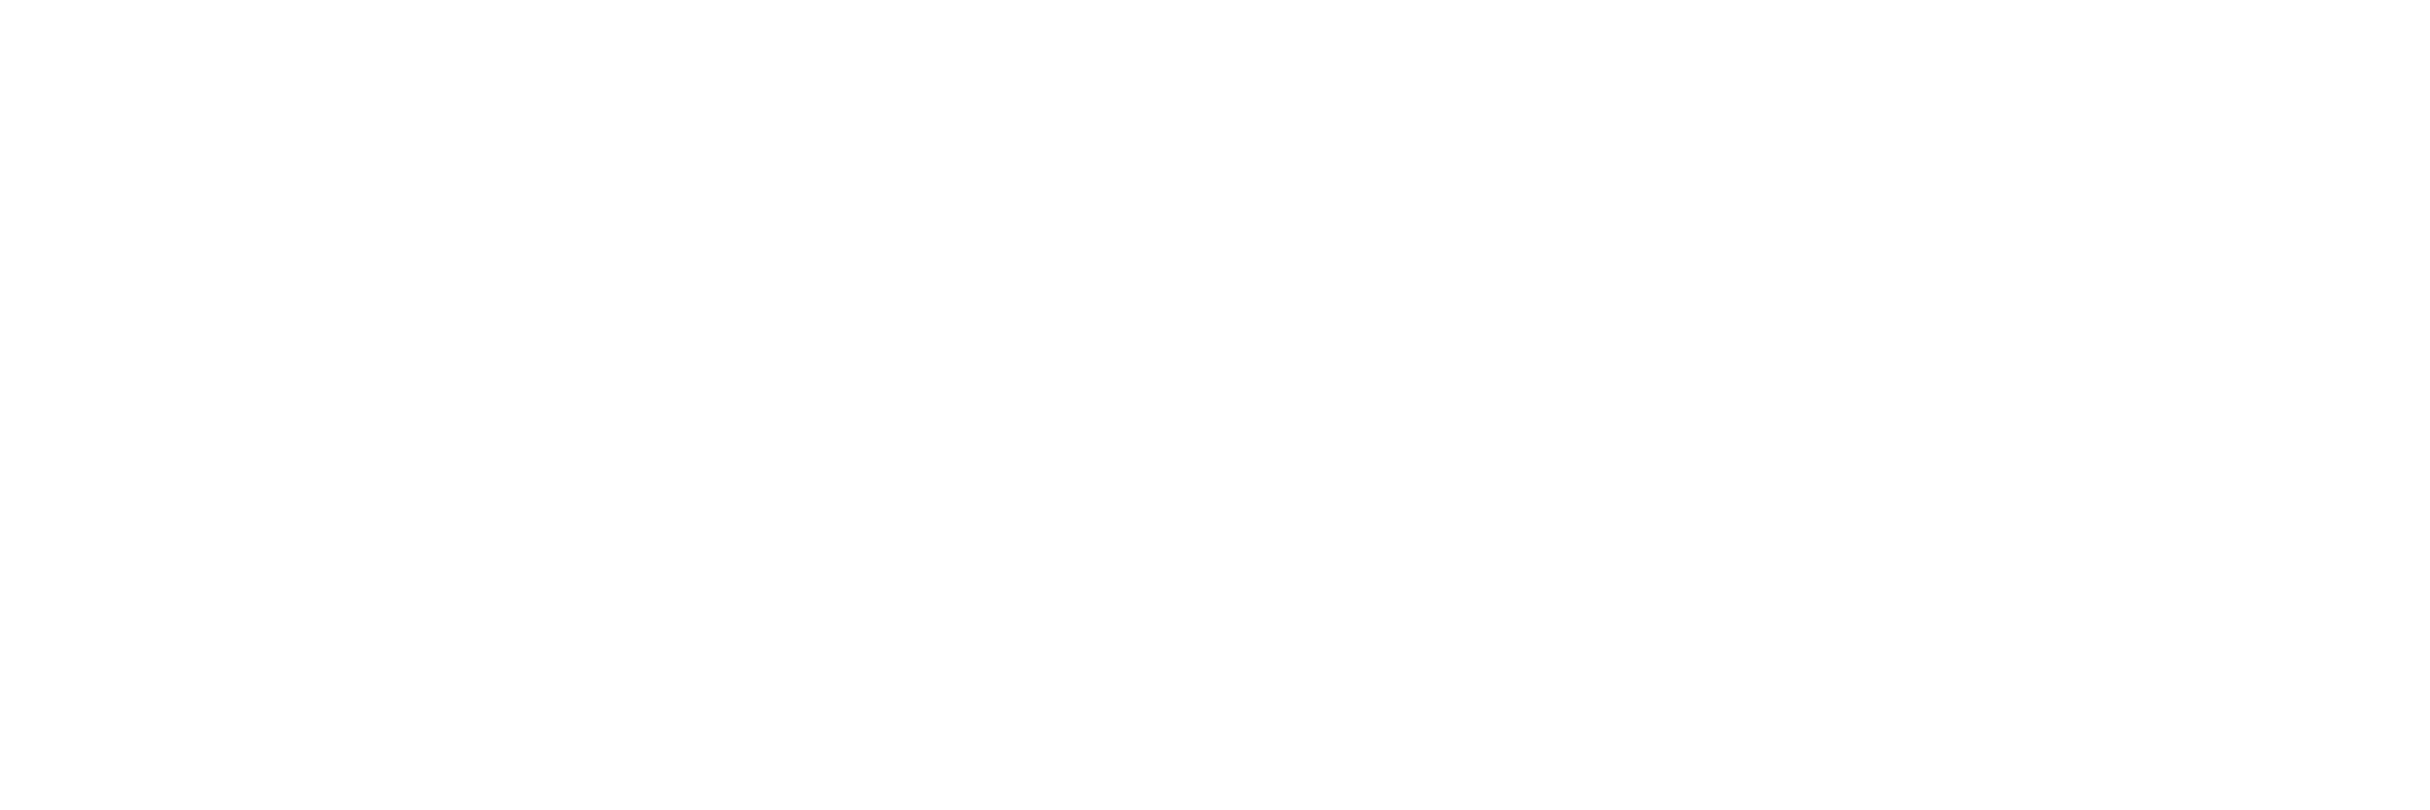

In [65]:
R_after_2012_12_01 = table.loc['2012-12-01 00:15:00':'2015-12-31 23:45', 'R_net']
R_after_2012_12_01.loc[(R_after_2012_12_01 < -60)]= np.nan
table.loc['2012-12-01 00:15:00':'2015-12-31 23:45', 'R_net'] = R_after_2012_12_01.values

plt.figure(figsize=[15,5])
plt.plot(table['R_net'])
plt.title('R_net')
plt.xlabel('Date')
plt.ylabel('R_net')

### Methane:

Text(0,0.5,'methane_flux')

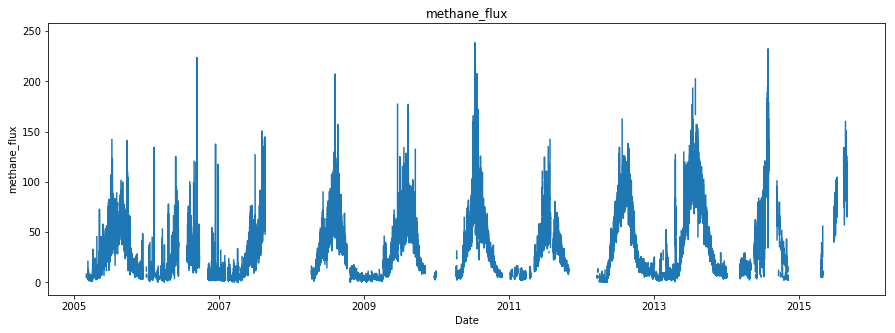

In [66]:
table.loc[(table.methane_flux < 0), ['methane_flux']] = np.nan
table.loc[(table.methane_flux > 250), ['methane_flux']] = np.nan

%matplotlib inline
%matplotlib inline
plt.figure(figsize=[15,5])
plt.plot(table['methane_flux'])
plt.title('methane_flux')
plt.xlabel('Date')
plt.ylabel('methane_flux')

## Plot histograms of data

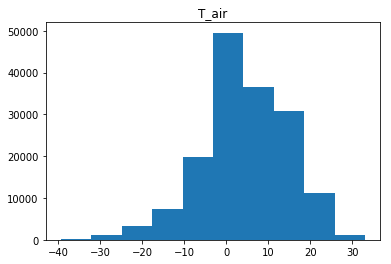

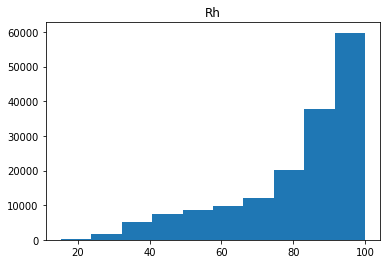

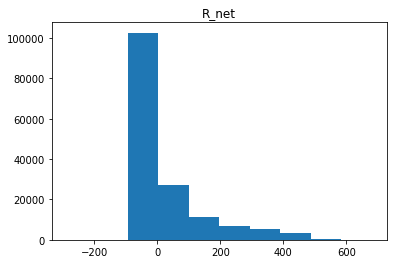

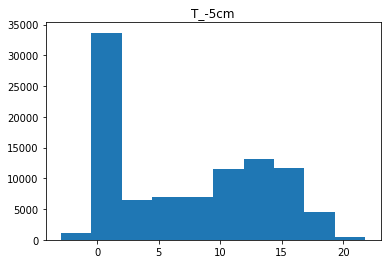

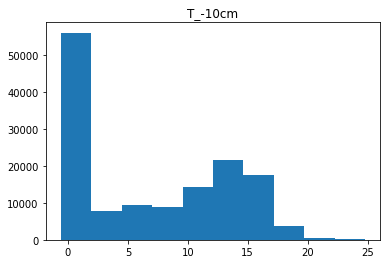

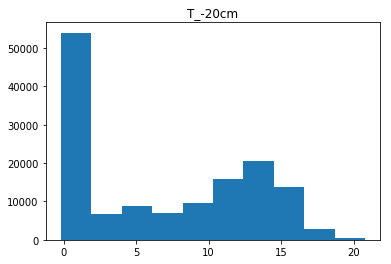

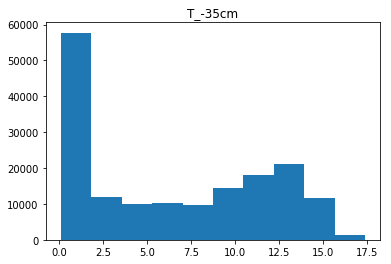

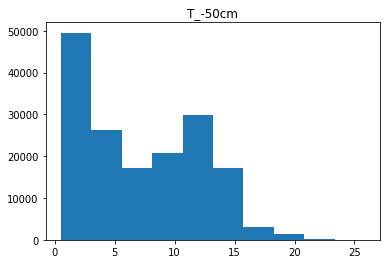

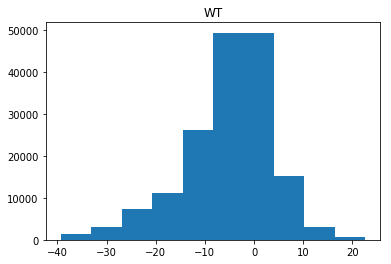

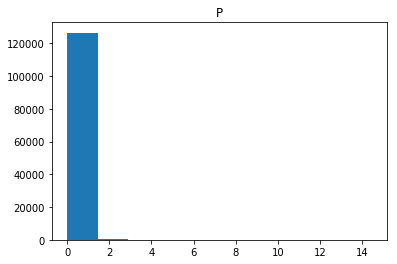

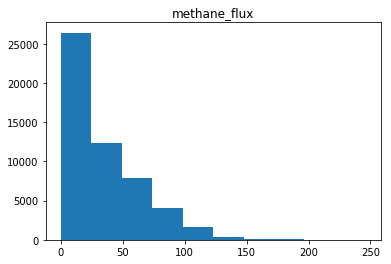

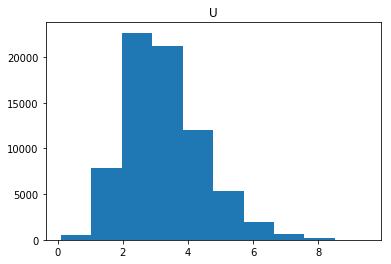

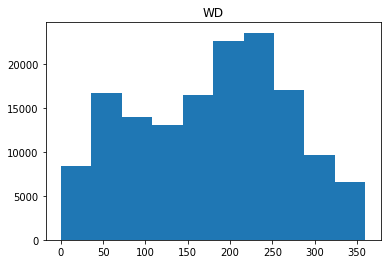

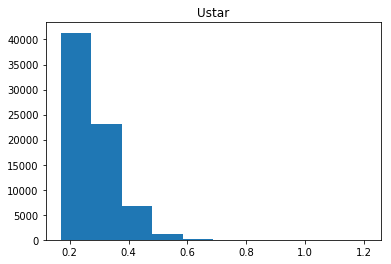

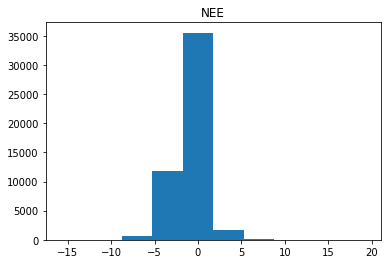

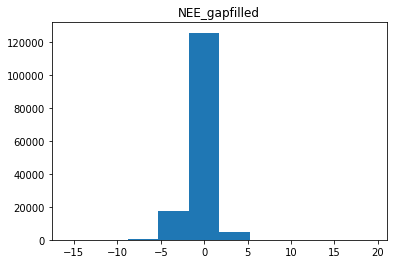

In [69]:
count = 0
for column in table:
    pylab.figure()
    pylab.hist((table.loc[~np.isnan(table[column]), column]))
    #pylab.show()
    pylab.title(table.columns[count])
    count = count + 1

#pylab.figure()
#pylab.hist(table.GPP[~np.isnan(table.GPP)])
#pylab.show()

In [70]:
table.to_csv('Cleaned_Subdaily.csv', sep=',')